In [1]:
#Necessary installs
!pip  install transformers
!pip install -U nlp
!pip install sentencepiece
!pip install -q xlrd

     |████████████████████████████████| 3.4 MB 12.1 MB/s 
     |████████████████████████████████| 596 kB 43.9 MB/s 
     |████████████████████████████████| 67 kB 4.9 MB/s 
     |████████████████████████████████| 895 kB 40.7 MB/s 
     |████████████████████████████████| 3.3 MB 38.2 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
     |████████████████████████████████| 1.7 MB 10.9 MB/s 
     |████████████████████████████████| 243 kB 44.2 MB/s 
     |████████████████████████████████| 1.2 MB 12.5 MB/s 


In [2]:
#Necessary Imports
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification
import torch
import nlp
from torch.utils.data import DataLoader

In [3]:
#selecting Model and Tokenizer and classify with Zero-Shot-Classification
device = torch.device('cuda' )
tokenizer = AutoTokenizer.from_pretrained("joeddav/xlm-roberta-large-xnli")
model = AutoModelForSequenceClassification.from_pretrained("joeddav/xlm-roberta-large-xnli")
classifier = pipeline("zero-shot-classification",
                      model=model, tokenizer = tokenizer)

Downloading:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/734 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.83M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.09G [00:00<?, ?B/s]

Some weights of the model checkpoint at joeddav/xlm-roberta-large-xnli were not used when initializing XLMRobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [4]:
#upload the Learning Catalogue.xlsx
from google.colab import files
uploaded = files.upload()

Saving Learning Catalogue.xlsx to Learning Catalogue.xlsx


In [5]:

df = pd.read_excel('Learning Catalogue.xlsx')
df = pd.DataFrame(df)


In [6]:
#classification with custom labels
candidate_labels = ["Finanzberatung leisten", "Kommunikationstechniken nutzen", "Projektleitung", "Investmentanalyse", "Statistik", "Mitarbeiter führen"]
candidate_results = [0, 0, 0, 0, 0, 0]

for sent in tqdm(df['Description'].values):
    # To do multi-class classification, simply pass multi_class=True.
    # In this case, the scores will be independent, but each will fall between 0 and 1.
    res = classifier(sent, candidate_labels, multi_class=True)

    if res['labels'][0] == 'Finanzberatung leisten' and res['scores'][0] > 0.5:
        candidate_results[0] = candidate_results[0] + 1
    if res['labels'][0] == 'Kommunikationstechniken nutzen' and res['scores'][0] > 0.5:
        candidate_results[1] = candidate_results[1] + 1
    if res['labels'][0] == 'Projektleitung' and res['scores'][0] > 0.5:
        candidate_results[2] = candidate_results[2] + 1
    if res['labels'][0] == 'Investmentanalyse' and res['scores'][0] > 0.5:
        candidate_results[3] = candidate_results[3] + 1
    if res['labels'][0] == 'Statistik' and res['scores'][0] > 0.5:
        candidate_results[4] = candidate_results[4] + 1
    if res['labels'][0] == 'Mitarbeiter führen' and res['scores'][0] > 0.5:
        candidate_results[5] = candidate_results[5] + 1

    if res['scores'][0] > 0.5:
        print(sent)
        print(res['labels'])
        print(res['scores'])
        print('\n')

print(candidate_results)
data = {'labels': candidate_labels,
        'values': candidate_results}

df_chart = pd.DataFrame(data, columns=['labels','values'])

df_chart.head()

  1%|          | 1/120 [00:16<33:09, 16.72s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


Die Digitalisierung hat unser gesamtes Leben völlig neu geprägt. Sie hat viele positive Seiten, aber auch negative Folgen wie Stress und Konzentrationsstörungen. In diesem eLearning analysieren Sie die Ursachen der digitalen Belastung und erhalten Tipps, wie Sie mit den Folgen der dauerhaften Erreichbarkeit umgehen können. Außerdem werden Sie mehrere Möglichkeiten kennenlernen und ausprobieren, mit denen Sie zurück in die Entspannung finden können. Außerdem können Sie mit unserem Digital-Detox-Notfallkoffer unmittelbar digitale Belastung erkennen und bekommen Werkzeuge an die Hand, mit denen Sie direkt etwas dagegen tun können.

Lernziele
- Sie (er)kennen die Ursachen der digitalen Belastung wie Multitasking, störenden Unterbrechungen und sofortige Belohnung und können hiermit bewusst umgehen.
- Sie analysieren Ihre Nutzung von digitalen Medien und Endgeräten.
- Sie entwickeln Strategien für einen bewussteren Umgang mit digitalen Medien und Endgeräten und nutzen Digital-Detox-Strategie

  2%|▏         | 2/120 [00:25<23:57, 12.18s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


Mails, Tweets und Posts, dazu Branchennews und Nachrichten – werden Sie der täglichen Informationsflut Herr. Lernen Sie, mit gezielten Techniken nur die relevanten Themen herauszufiltern, effizient zu verarbeiten und bei Bedarf wieder abzurufen. Alles andere wandert in den Papierkorb.

Lernziele
Ihr Grundlesetempo ist schneller.
Ihr Text- und Leseverständnis ist besser als vorher.
Sie können das Gelesene besser erinnern und gespeicherte Informationen schnell wiederfinden.
Sie beherrschen verschiedene Entspannungstechniken, um konzentrierter Informationen aufzunehmen.
['Kommunikationstechniken nutzen', 'Mitarbeiter führen', 'Statistik', 'Finanzberatung leisten', 'Projektleitung', 'Investmentanalyse']
[0.9978286623954773, 0.8919194936752319, 0.8090440630912781, 0.8012803196907043, 0.7920933961868286, 0.7092227339744568]




  2%|▎         | 3/120 [00:44<29:40, 15.21s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


Wann fühlen Sie sich in Ihrem beruflichen und privaten Alltag so richtig gestresst? Wenn Sie einen Termin nicht halten können? Wenn es mit dem/der Chef*in oder den Kolleg*innen knirscht? Mit diesem eLearning identifizieren Sie, was bei Ihnen Stress auslöst und erfahren, was Ihre Werte und Emotionen damit zu tun haben. Am Ende wissen Sie, was bei Stress im Körper passiert und Ihnen wird klar, wo Sie ansetzen müssen, um Stress zu bewältigen. Tipps und Übungen helfen Ihnen dabei, Ihren persönlichen Weg aus dem Stress zu finden und künftige Herausforderungen besser zu meistern. Des Weiteren zeigt Ihnen das eLearning die Ursachen und Anzeichen für ein Burnout-Syndrom auf und es werden Methoden vermittelt, um diesem vorzubeugen.

Lernziele
Sensibilisierung für die Entstehung und Bewältigung von Stress.
Grundverständnis von körperlichen Stressreaktionen und der Rolle von Stressoren.
Erkennen persönlicher Stressauslöser und Stressfolgen.
Reflexion über die individuelle Auswirkung von Stress.
V

  3%|▎         | 4/120 [01:04<33:11, 17.17s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


Zeitmanagement ist in der heutigen, komplexen, schnellen und flexiblen Arbeitswelt unverzichtbar geworden. Doch wie soll mit den Aufgaben und Verpflichtungen umgegangen werden, die auf einen hereinstürmen? Was kann getan werden, um einen optimalen Ausgleich zwischen Beruf und Privatleben herzustellen? Wie können die eigenen Ressourcen und Kompetenzen optimal eingesetzt werden? Wie können Ziele erreicht werden, ohne dabei auszubrennen? Zeitmanagement bedeutet, gesund und gelassen die täglichen Aufgaben zu schaffen und dabei Freiraum für die wichtigen und schönen Dinge im Leben zu finden. Mit diesem eLearning können Sie einen eigenen Typencheck durchführen und erhalten individuelle Tipps für ein optimales Zeitmanagement, passend zu Ihrem Organisationstyp.

Lernziele
- Sie wissen, was Sie machen können, um mit Spaß, Zufriedenheit und Glück durch Ihren Alltag zu gehen.
- Sie können Stresssituationen entzerren und Druck vermeiden.
- Sie kennen Ihre eigenen Zeitdiebe und wissen, was Sie gege

  4%|▍         | 5/120 [01:18<30:29, 15.91s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


Manche Menschen gehen gestärkt aus Krisen hervor, während andere daran förmlich zerbrechen. Der Unterschied liegt in der Resilienz, einer Widerstandskraft, mit der Sie Belastungen besser überstehen und der aufreibenden Arbeitswelt gelassener gegenübertreten. Erfahren Sie hier, wie Sie Herausforderungen meistern, ohne körperlich und seelisch Schaden zu nehmen.

Lernziele
- Sie können Ihre Stimmungslage bewusster erkennen und ein Aufschaukeln negativer Emotionen vermeiden.
- Sie nehmen Erfolge bewusster wahr und erfahren mehr Selbstbestätigung.
- Sie sind sich Ihrer eigenen Stärken bewusst und entwickeln eine positive Haltung sich selbst gegenüber.
- Sie wissen, wie Ihre körperliche Haltung Ihre geistige Haltung beeinflusst und wie Sie dies für sich nutzen können.
- Sie holen sich gezielt Rat und nutzen die Stärken anderer, wenn Sie nicht mehr weiterkommen.
- Sie besitzen durch Wertschätzung eine positive Auswirkung auf sich selbst und Ihr Umfeld.
['Kommunikationstechniken nutzen', 'Proj

  5%|▌         | 6/120 [01:28<26:28, 13.93s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


Die Arbeit im Homeoffice erfordert ein hohes Maß an Selbstorganisation. Erfahren Sie in diesem eLearning, wie Sie sich im Homeoffice besser organisieren und Ihre Produktivität steigern. Prüfen Sie mit dem Selbsttest, ob Sie mit der Arbeit im Homeoffice gut zurecht kommen oder was Sie verändern müssen. Nutzen Sie Ihre Arbeitszeit auch zuhause optimal.

Lernziele:
- Sie verstehen, welche Vorteile Homeoffice bietet und können einschätzen, wo für Sie Schwierigkeiten liegen können.
- Sie können Rahmenbedindungen für effizientes Arbeiten im Homeoffice schaffen.
- Sie können Störfaktoren gezielt eliminieren und Ihre Produktivität steigern.
- Sie können Ihren Arbeitsplatz sinnvoll einrichten.
['Investmentanalyse', 'Finanzberatung leisten', 'Projektleitung', 'Mitarbeiter führen', 'Statistik', 'Kommunikationstechniken nutzen']
[0.9694050550460815, 0.9687100052833557, 0.9655808806419373, 0.9493686556816101, 0.9442365765571594, 0.9221016764640808]




  6%|▌         | 7/120 [01:37<23:05, 12.26s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


In diesem eLearning lernen Sie, wie unser Gehirn funktioniert und wie es Höchstleistungen bringen kann. Dabei lösen wir schulisch konditionierte Glaubenssätze auf, erklären komplexe Zusammenhänge sehr einfach und zeigen konkrete Methoden und Tricks, wie das Lernen natürlicher wird und auch endlich wieder Spaß macht.

Lernziele
Sie wissen wie Ihr Gehirn funktioniert und welcher Lerntyp Sie sind.
- Sie können 2 Memotechniken anwenden, mit denen Sie sich an Inhalte langfristig erinnern.
- Sie wissen was Speed und was Selective reading bedeutet und können beide Methoden anwenden.
['Kommunikationstechniken nutzen', 'Mitarbeiter führen', 'Finanzberatung leisten', 'Projektleitung', 'Investmentanalyse', 'Statistik']
[0.7708883285522461, 0.6395421624183655, 0.6215983629226685, 0.5799393057823181, 0.4579707384109497, 0.4315153956413269]




  7%|▋         | 8/120 [01:47<21:50, 11.70s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


Hygiene am Arbeitsplatz gewinnt in Zeiten von Corona und Co. eine besondere Brisanz – nicht nur für jeden einzelnen Mitarbeiter, sondern auch für Unternehmen. Denn Krankheitswellen können enormen wirtschaftlichen Schaden anrichten.

Durch ein gesteigertes Hygiene-Bewusstsein der gesamten Belegschaft lassen sich diese Risiken abfedern und die Gesundheit der wertvollsten Unternehmensressource erhalten.

Lernziele
- Sie lernen, welche Viren und Bakterien am Arbeitsplatz „lauern“.
- Sie erfahren, warum Ihre Hände Risikofaktor Nr. 1 sind.
- Sie lernen, wie Sie sich effektiv vor einer Ansteckung schützen können.
- Sie wissen, wo Sie stets aktuelle Informationen über Corona & Co. finden.
['Kommunikationstechniken nutzen', 'Mitarbeiter führen', 'Finanzberatung leisten', 'Investmentanalyse', 'Projektleitung', 'Statistik']
[0.7165541052818298, 0.7053813934326172, 0.6758046746253967, 0.6732327938079834, 0.6627792716026306, 0.6605891585350037]




  8%|▊         | 9/120 [02:00<22:07, 11.96s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


Korruption kann in vielen Bereichen des Geschäftslebens auftauchen. Der Erfolg eines Unternehmens ist eng mit dem Vertrauen der Kunden und der Öffentlichkeit in die Integrität eines Unternehmens verknüpft. Alle Mitarbeiter müssen erkennen können, wann es sich um Korruption handelt und in welchen Situationen sie besonders vorsichtig und umsichtig sein müssen. Dieses eLearning hilft Ihnen, alle Mitarbeiter im Unternehmen für Korruptionsvergehen im Geschäftsalltag zu sensibilisieren. So können Sie Haftungsrisiken und Strafen vermeiden.

Lernziele
- Die Mitarbeiter wissen, was Korruption ist.
- Die Mitarbeiter kennen die Folgen, mit denen derjenige rechnen muss, der besticht oder sich bestechen lässt.
- Sie kennen die Sorgfaltspflichten zur Verhinderung von Korruption im Unternehmen.
- Die Mitarbeiter wissen, was sie ganz persönlich zur Verhinderung von Korruption beitragen können.
['Statistik', 'Mitarbeiter führen', 'Investmentanalyse', 'Kommunikationstechniken nutzen', 'Finanzberatung le

  8%|▊         | 10/120 [02:13<22:34, 12.31s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


Geschenke und Einladungen gehören zum Geschäftsleben. Aber seit vermehrt Fälle von Bestechung und Vorteilsnahme die Gerichte beschäftigen, sind viele Mitarbeiter im Unternehmen verunsichert: Kann man einen Geschäftspartner noch zum Essen einladen? Ist ein Geschenk als Dank für die Zusammenarbeit angemessen oder bringt man sich und ihn damit in Schwierigkeiten? Dieses Training unterstützt Ihre Mitarbeiter dabei zu entscheiden, was zulässig ist, wo besondere Vorsicht geboten ist und was man besser unterlassen sollte. So können alle im Unternehmen sicher mit Geschenken und Einladungen umgehen.

Lernziele
- Ihre Mitarbeiter lernen die wichtigsten Regeln, die beim Umgang mit Geschenken und Einladungen zu beachten sind.
- Sie wissen, wo die Grenze zwischen einer legitimen Beziehungspflege und einer Handlung liegt, die unter Umständen strafbar sein kann.
- Ihre Mitarbeiter können sichere Entscheidungen in Bezug auf das Thema Geschenke und Einladungen treffen und Interessenkonflikte vermeiden.

  9%|▉         | 11/120 [02:25<22:12, 12.23s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


Jeder Mensch ist einzigartig und damit immer irgendwie anders als andere. Im Arbeitsleben will das Allgemeine Gleichbehandlungsgesetz davor schützen, dass Menschen unberechtigt benachteiligt werden, nur weil sie „anders” sind. Arbeitgeber sind dazu verpflichtet, ihre Mitarbeiter und Führungskräfte zum Allgemeinen Gleichbehandlungsgesetz zu informieren und zu schulen. Unterstützen Sie Ihre Mitarbeiter bei deren Beitrag für ein tolerantes und benachteiligungsfreies Miteinander am Arbeitsplatz.

Lernziele
- Ihre Mitarbeiter wissen, wie sie Benachteiligungen am Arbeitsplatz vermeiden und sich davor schützen können.
- Ihre Mitarbeiter kennen die Benachteiligungen und wissen, was verboten ist.
- Ihre Mitarbeiter kennen die zulässigen Ausnahmen und wissen, was erlaubt ist.
- Ein benachteiligungsfreies Arbeitsumfeld: Jeder Mitarbeiter weiß, was er dafür tun kann.
['Mitarbeiter führen', 'Investmentanalyse', 'Statistik', 'Finanzberatung leisten', 'Projektleitung', 'Kommunikationstechniken nutzen

 10%|█         | 12/120 [02:40<23:37, 13.12s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


Führungskräfte, die eine Vielzahl an Menschen in einem Unternehmen koordinieren, bewegen sich auf einem schmalen Grat zwischen legitimer Ungleichbehandlung und unerlaubter Benachteiligung. Das eLearning "AGG für Führungskräfte" klärt Ihre Führungskräfte über das Allgemeine Gleichbehandlungsgesetz auf und gibt ihnen das notwendige Wissen an die Hand, um diskriminierende Benachteiligung am Arbeitsplatz sowie zulässige Ausnahmen zu erkennen und inakzeptable Benachteiligungen zu verhindern.

Lernziele
- Ihre Führungskräfte sind sich ihrer eigenen Verantwortung sowie ihrer Rechte und Pflichten bewusst.
- Anhand praxisnaher Beispiele erfahren Ihre Führungskräfte, wie sie Benachteiligungen am Arbeitsplatz vorbeugen können.
- Ihre Führungskräfte wissen, welche Maßnahmen im Falle einer Benachteiligung zu ergreifen sind.
- Ihre Führungskräfte wissen, in welchen Ausnahmefällen Ungleichbehandlungen zulässig sind.
- Ihre Führungskräfte können sich und ihre Mitarbeiter in der Bewerbungsphase, währen

 11%|█         | 13/120 [03:00<27:01, 15.15s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


Ob als Start-up oder etablierte Marke: Mit Ihren Produkten oder Dienstleistungen stehen Sie in einem dynamischen Wettbewerb mit vielen anderen, innovationsgetriebenen Anbietern. Kennt der Markt Sie bereits gut? Wissen Ihre Kunden, für was Sie stehen? Verstehen sie Ihre Werbebotschaften? Und richten Sie Ihre Marketingstrategien an den Bedürfnissen der Kunden aus?
Wenn Sie diese Fragen noch nicht beantworten können, sind Sie hier genau richtig. Erfahren Sie, woran Sie Ihre eigene Marktposition festmachen können und wie Sie sich vom Wettbewerb differenziert bekommen. Verstehen Sie Ihre Chancen im Markt und lernen Sie Ihre potenziellen Kunden besser kennen.
Nur so können Sie Strategien entwickeln, um sich auch für den Markt der Zukunft zu wappnen und sich innovativ und kundenorientiert weiterzuentwickeln.

Lernziele
- Sie verstehen, warum Marktanalysen für Ihre Produkte bzw. Ihre Marke relevant sind, um nicht im Blindflug unterwegs zu sein.
- Sie können in Kennzahlen darstellen, welche Pos

 12%|█▏        | 14/120 [03:10<23:52, 13.51s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


Big Data, Internet of Things, Blockchain – das sind Begriffe, die Ihnen bestimmt schon oft begegnet sind. Die Digitalisierung ist in Ihrem Alltag schon angekommen und wird sich auch auf Ihren Job auswirken. Aber verstehen Sie eigentlich die Konzepte, die hinter den digitalen Megatrends stecken?

Lernziele
- Sie wissen welche digitalen Megatrends es gibt.
- Sie verstehen wie die Megatrends sich bereits auf den Alltag auswirken.
- Sie erfahren wohin sich die Trends entwickeln werden.
- Sie verstehen dass Sie sich vor der Digitalisierung nicht verstecken können.
- Sie erkennen die Chancen, die Ihnen die Digitalisierung bietet.
- Sie verstehen die Konzepte hinter den Trends.
['Finanzberatung leisten', 'Mitarbeiter führen', 'Projektleitung', 'Kommunikationstechniken nutzen', 'Investmentanalyse', 'Statistik']
[0.9563692212104797, 0.943730890750885, 0.9149171710014343, 0.9143698811531067, 0.9060418009757996, 0.897132933139801]




 12%|█▎        | 15/120 [03:16<20:00, 11.43s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


Digitale Transformation bringt viele neue Möglichkeiten mit sich, die Ihr Unternehmen noch effizienter agieren lassen. Doch was heißt eigentlich digitale Transformation? Und was sind die aktuellen Trends, mit denen es gelingt, Mehrwert für Angebote zu schaffen? Dies und mehr erfahren Sie in diesem Kurs.

Lernziele
- Sie kennen die Vorteile der digitalen Transformation und können diese erklären.
- Sie kennen die 10 Megatrends der Digitalisierung.
['Kommunikationstechniken nutzen', 'Mitarbeiter führen', 'Projektleitung', 'Finanzberatung leisten', 'Investmentanalyse', 'Statistik']
[0.7434048652648926, 0.6155170798301697, 0.553745687007904, 0.4930194616317749, 0.35403063893318176, 0.22132985293865204]




 13%|█▎        | 16/120 [03:23<17:08,  9.89s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


Digitale Transformation birgt das Potential, Tempo in Ihre Organisation zu bringen. Geschwindigkeit ist wichtig, um am Markt erfolgreich zu sein und zu bleiben. Wie Sie das Tempo innerhalb Ihrer Organisation erhöhen und weiterhin auf Erfolgskurs bleiben, erfahren Sie in diesem Kurs.

Lernziele
- Sie können die Chancen von mehr Tempo in unternehmerischen Prozessen erklären.
- Sie können Ihre Arbeitsprozesse effizienter und schneller gestalten.
['Kommunikationstechniken nutzen', 'Statistik', 'Projektleitung', 'Finanzberatung leisten', 'Mitarbeiter führen', 'Investmentanalyse']
[0.9235630631446838, 0.8420441150665283, 0.7815587520599365, 0.7731040716171265, 0.7369508147239685, 0.7232531309127808]




 14%|█▍        | 17/120 [03:30<15:53,  9.26s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


Neue Tools und Methoden unterstützen Sie und Ihr Unternehmen dabei die digitale Transformation erfolgreich zu meistern. In diesem Kurs erhalten Sie einen Überblick von Design Thinking bis Agilität, um fundiert mitreden zu können.

Lernziele:
- Sie kennen die Grundlagen des agilen Arbeitens und können diese erklären.
- Sie wissen was "Minimum Viable Product" und das Konzept "Lean" sowie die Methoden "Design Thinking", "Scrum" und "Kanban" bedeuten und können diese erklären.
['Kommunikationstechniken nutzen', 'Statistik', 'Projektleitung', 'Mitarbeiter führen', 'Investmentanalyse', 'Finanzberatung leisten']
[0.9915227890014648, 0.7972010374069214, 0.7505752444267273, 0.733516275882721, 0.6210987567901611, 0.515028178691864]




 15%|█▌        | 18/120 [03:41<16:11,  9.53s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


Grundlagenwissen im Bereich BWL ist für jeden Mitarbeiter wichtig, um die Organisationseinheit Unternehmen besser zu verstehen und kostengünstiger arbeiten zu können. Mit unserem eLearning können Ihre Mitarbeiter dieses Wissen erwerben bzw. festigen. So kennen alle Mitarbeiter Grundzüge der Betriebswirtschaftslehre und können damit ihren Beitrag zum Unternehmenserfolg leisten!

Lernziele
- Sie wissen, was ein Geschäftszweck ist und kennen die einzelnen Unternehmensformen.
- Sie lernen das Kostencontrolling kennen, d. h. welche Kosten und Kostenarten entstehen im Unternehmen.
- Sie lernen die Kennzahlenanalyse, -berechnung und die richtige Verwendung der Kennzahlen kennen.
- Sie lernen den Aufbau einer Bilanz und die Gewinn- und Verlustrechnung kennen.
['Statistik', 'Projektleitung', 'Kommunikationstechniken nutzen', 'Mitarbeiter führen', 'Finanzberatung leisten', 'Investmentanalyse']
[0.9403603076934814, 0.9079245328903198, 0.9051522612571716, 0.903689980506897, 0.8942452073097229, 0.8

 16%|█▌        | 19/120 [03:53<17:44, 10.54s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


Für alle Mitarbeiter, die mit planenden, steuernden und koordinierenden Aufgaben betraut sind, sind Kenntnisse des Controllings unverzichtbar. Mit unserem eLearning können Ihre Mitarbeiter dieses Wissen im Bereich Controlling erwerben bzw. festigen. So kennen alle Controlling als integrierten Managementprozess im Unternehmen und lernen die Umsetzung wichtiger Controlling-Instrumente und Tools in die betriebliche Praxis.

Lernziele
- Sie lernen, was man unter Controlling versteht und kennen die Aufgaben und Methoden des operativen und strategischen Controllings.
- Sie lernen die verschiedenen Kostenarten kennen und wissen, wie und wann Kostenstellen im Unternehmen zum Einsatz kommen.
- Sie wissen, welche Bestandteile ein Kalkulationsschema hat und wie eine Kalkulation grundlegend aufgebaut wird.
- Sie kennen die Bestandteile und den Aufbau einer Deckungsbeitragsrechnung und wissen, wie eine Break-Even-Analyse durchgeführt wird.
['Statistik', 'Finanzberatung leisten', 'Mitarbeiter führen

 17%|█▋        | 20/120 [04:04<17:27, 10.48s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


Was im Privatleben schon selbstverständlich ist, wird in Zukunft auch im Beruf wichtiger: Fragen mit Hilfe von digitalen Wissensquellen schnell beantworten. Von der schnellen Google-Suche über Online-Kurse von Experten bis hin zu Videoanleitungen für Alltagsprobleme findet man online auf jede Frage eine Antwort.
In diesem Training lernen Sie, wie Sie die einzelnen Wissensquellen effektiv benutzen können, um Ihren Berufsalltag effizienter zu machen.

Lernziele:
 - Sie erfahren welche digitalen Wissensquellen es gibt.
 -  Sie lernen wie Sie diese Wissensquelle effektiv nutzen.
 -  Sie lernen gute Fragen für eine effiziente Suche zu formulieren.
 -  Sie erfahren wie Sie die Qualität von Antworten hinterfragen und bewerten.
['Finanzberatung leisten', 'Mitarbeiter führen', 'Kommunikationstechniken nutzen', 'Projektleitung', 'Investmentanalyse', 'Statistik']
[0.9224314093589783, 0.9084124565124512, 0.8635507225990295, 0.8241702914237976, 0.8013505935668945, 0.7613286375999451]




 18%|█▊        | 21/120 [04:17<18:44, 11.36s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


Projekte nehmen immer häufiger komplexe Züge an. Agile Methoden bieten hierfür Ansätze, mit diesen neuen Bedingungen umzugehen. Dieses eLearning vermittelt, ausgehend von den theoretischen Grundlagen des agilen Projektmanagements, alle wichtigen Arbeitsweisen, um Projekte agil anzugehen und voranzutreiben. Neben rein agilen Methoden, wie z. B. Scrum, werden auch verschiedene Mischtypen aufgezeigt.

Lernziele
- Sie kennen die Grundlagen des agilen Projektmanagements.
- Sie kennen die Unterschiede zwischen agilem und klassischem Projektmanagement.
- Sie kennen agile Grundprinzipien und haben verstanden, dass agil auch in Projekten außerhalb des IT-Umfelds funktionieren kann.
- Sie haben ein Bewusstsein für die Prozesse und Artefakte agiler Projekte.
- Sie kennen die verschiedenen Rollen in agilen Projekten.
- Sie kennen Stellschrauben, Chancen und Grenzen von agilen Projekten.
['Projektleitung', 'Kommunikationstechniken nutzen', 'Mitarbeiter führen', 'Statistik', 'Investmentanalyse', 'Fi

 19%|█▉        | 23/120 [04:39<17:49, 11.03s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


Das Bundesarbeitsgericht versteht unter Mobbing am Arbeitsplatz systematische Angriffe gegen Mitarbeiter*innen, die nicht nur einmalig, sondern über einen längeren Zeitraum stattfinden. Umgangssprachlich wird Mobbing auch als Psychoterror am Arbeitsplatz bezeichnet. In diesem eLearning lernen Sie, die Ursachen und Folgen von Mobbing zu verstehen und bewusst gegen Mobbing vorzugehen.

Lernziele
- Sie kennen die Ursachen und unterschiedlichen Formen von Mobbing.
- Sie wissen, welche Folgen Mobbing für die Beteiligten und das Unternehmen hat.
- Sie können Mobbingverhalten erkennen und gezielt eingreifen.
- Sie können Maßnahmen ergreifen, um Mobbing vorzubeugen.
['Statistik', 'Finanzberatung leisten', 'Investmentanalyse', 'Projektleitung', 'Mitarbeiter führen', 'Kommunikationstechniken nutzen']
[0.9877405762672424, 0.9877071380615234, 0.9828213453292847, 0.9800726175308228, 0.9767376184463501, 0.893817663192749]




 20%|██        | 24/120 [04:58<21:32, 13.46s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


Blended Learnings werden von Trainern und Personalern als DAS Lernformat mit dem größten Wachstumspotenzial gesehen.
Hierbei kommt das Beste aus Präsenz und digitalen Lerneinheiten zusammen, um den größtmöglichen Lernerfolg zu gewährleisten. Durch Blended-Learning-Szenarien ermöglichen Sie bedarfsgerechtes Lernen und orientieren sich im Idealfall an den konkreten Projekten der Teilnehmer. Lernen Sie in diesem eLearning Schritt für Schritt effektive Blended-Learning-Konzepte zu entwickeln.

Lernziele
- Sie wissen, was Blended Learning ist und kennen Mehrwert und Einsatzmöglichkeiten.
- Sie wissen, wie Sie in 10 Schritten ein nachhaltiges Blended-Learning-Konzept entwickeln.
- Sie kennen die Rahmenbedingungen, die es bei der Konzeption zu beachten gilt und warum.
- Sie wissen, wie Sie Lernziele aus dem Projektziel ableiten und können diese definieren.
- Sie können Lernbausteine gestalten und wissen, wann welches Lernformat Sinn ergibt.
- Sie wissen, was eine Learner Journey ist und könne

 21%|██        | 25/120 [05:08<19:26, 12.28s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


Delegieren bedeutet, Verantwortung und Kompetenz an Mitarbeiter zu übertragen. Dabei geht es nicht nur darum, kleinere Teilaufgaben zu übertragen, sondern auch um die Zuweisung von mehr Verantwortung und Entscheidungsbefugnis. Dies bringt jedoch nicht nur Vorteile mit sich, sondern birgt auch Risiken.

In diesem Training lernen Sie, Risiken der Delegation möglichst zu vermeiden und die Vorteile optimal zu nutzen.

Lernziele
- Sie wissen welche Aufgaben delegiert werden können.
- Sie können Aufgaben so verteilen, dass Mitarbeiter motiviert werden.
- Sie können Mitarbeiter richtig einschätzen und so Probleme vorausschauend vermeiden.
- Sie können sowohl schriftlich als auch mündlich souverän delegieren.
['Kommunikationstechniken nutzen', 'Mitarbeiter führen', 'Projektleitung', 'Finanzberatung leisten', 'Investmentanalyse', 'Statistik']
[0.7229152321815491, 0.6808896660804749, 0.5935639142990112, 0.5732877850532532, 0.550129234790802, 0.5371242761611938]




 22%|██▏       | 26/120 [05:29<23:29, 15.00s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


Jeder Mensch trifft täglich viele Entscheidungen – auch Sie haben heute sicher schon viele kleine Entscheidungen getroffen. Manche Menschen wägen Entscheidungen lange ab, andere entscheiden häufig aus dem Bauch heraus. Meistens machen wir uns über Entscheidungsprozesse wenig Gedanken. Doch was tun Sie, wenn Sie im beruflichen Kontext eine Entscheidung treffen müssen, die Sie auch rational begründen müssen? Oder Sie unterschiedliche Meinungen und Ansichten in einem Entscheidungsprozess miteinander verbinden müssen? Oder Sie unsicher sind, was genau eigentlich entschieden werden soll?

Dieses eLearning zeigt auf, wie Sie durch ein phasenweises Vorgehen zu guten und tragfähigen Entscheidungen kommen.

Lernziele
- Sie lernen ein Phasenmodell für Entscheidungen kennen.
- Sie wissen, wie Sie Ziele für Entscheidungen formulieren können.
- Sie können die Stakeholder einer Entscheidung identifizieren und ihren Einfluss abschätzen.
- Sie können Stärken, Schwächen, Chancen und Risiken einer Entsc

 22%|██▎       | 27/120 [05:40<21:17, 13.74s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


Aus Fehlern wird man klug – das sagt sich so leicht. Im Job sieht die Realität meist anders aus: Da empfinden wir Fehler oft als peinliches No-Go und möchten die Schuld am liebsten einem Sündenbock in die Schuhe schieben. Eine solch destruktive Fehlerkultur ist Gift fürs Betriebsklima und blockiert wichtige Lernprozesse. Wie sie lernen, heiter(er) zu scheitern, zeigen Ihnen dieses eLearning!

Lernziele
- Sie wissen, dass Fehler manchmal notwendig und sogar nützlich sind.
- Sie wissen auch, dass das Ignorieren und Bestrafen von Fehlern tabu ist.
- Sie können Fehler mehr als Chance zur Entwicklung begreifen
- Sie gehen konstruktiver mit eigenen Fehlern und denen der anderen um.
['Kommunikationstechniken nutzen', 'Statistik', 'Mitarbeiter führen', 'Investmentanalyse', 'Finanzberatung leisten', 'Projektleitung']
[0.6886888146400452, 0.6202402114868164, 0.6183827519416809, 0.6103808879852295, 0.6078663468360901, 0.6017414331436157]




 23%|██▎       | 28/120 [06:08<27:31, 17.95s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


In schwierigen Führungssituationen wird von Ihren Führungskräften nicht nur soziale Kompetenz erwartet, sondern auch eine für das Unternehmen juristisch korrekte Vorgehensweise. Arbeitsrechtliches Fachwissen ist daher für jede Führungskraft in Ihrem Unternehmen unverzichtbar, um in den Beschäftigungsverhältnissen mit Ihren Mitarbeitern immer rechtssichere Entscheidungen zu treffen und Mitarbeiter nachvollziehbar zu führen.

Lernziele
- Sie erhalten grundlegende rechtliche Informationen, um Aufhebungsverträge wirksam abschließen zu können und wissen, welche Formvorschriften und Aufklärungs- und Hinweispflichten Sie im Zusammenhang mit Aufhebungsverträgen beachten müssen.
- Sie wissen, welche Zeugnisarten es gibt und wann ein Anspruch auf Zeugniserstellung besteht und Sie wissen, was bei der Zeugniserstellung bezüglich Form, Aufbau und vor allem Inhalt zu beachten ist.
- Sie kennen die rechtlichen Vorgaben zur täglichen Höchstarbeitszeit, wissen was Sie bezüglich Ruhepausen und Ruhezeite

 24%|██▍       | 29/120 [06:18<23:42, 15.64s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


Als Führungskraft Ihres Teams werden Sie im digitalen Zeitalter vor neue Herausforderungen gestellt und müssen die Zusammenarbeit Ihres Teams neu definieren. Dazu gibt Ihnen Christoph Burkhardt in diesem Kurs wertvolle Tipps und Impulse Ihre eigene Rolle im Rahmen der Mitarbeiterführung zu reflektieren und die Zusammenarbeit Ihres Teams neu zu denken.

Lernziele
- Sie wissen welches Mindset Ihr Team erfolgreich machen kann.
- Sie lernen, wie sie die Neugier Ihrer Mitarbeiter wecken und ihre Einzigartigkeit fördern können.
- Sie wissen, wie Sie auf das immer höhere Tempo reagieren müssen.
- Sie lernen, die Bedeutung der Art Ihrer Sprache als Führungskraft.
- Sie wissen, wie Sie Ihre Mitarbeiter in stressigen Zeiten stärken können. 
['Kommunikationstechniken nutzen', 'Mitarbeiter führen', 'Investmentanalyse', 'Statistik', 'Finanzberatung leisten', 'Projektleitung']
[0.9905716776847839, 0.9879035353660583, 0.9683818817138672, 0.9313066601753235, 0.9297899007797241, 0.8210902810096741]




 25%|██▌       | 30/120 [06:28<21:12, 14.14s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


Im digitalen Zeitalter müssen Sie als Führungskraft gleichzeitig mehrere Herausforderungen meistern. Sie müssen Ihre eigene Rolle aber auch die Rolle Ihrer Mitarbeiter neu definieren. Dazu gibt Ihnen Christoph Burkhardt in diesem Kurs wertvolle Tipps und Impulse Ihre eigene Rolle zu reflektieren und Ihre Rolle als Führungskraft neu zu denken.

Lernziele
- Sie lernen, die Bedeutung Ihres eigenen Purpose kennen und wie dieser mit Ihrer Strategie zusammenhängt.
- Sie wissen, wie Sie aktiver Gestalter werden und Ihren Purpose nicht aus den Augen verlieren.
- Sie lernen, wie Sie Ihre Strategie definieren.
- Sie wissen wie Sie mit Risiken umgehen und dabei fokussiert bleiben.
- Sie wissen, wie wertvoll gute Netzwerke sind und wie Sie diese schaffen. 
['Mitarbeiter führen', 'Kommunikationstechniken nutzen', 'Projektleitung', 'Finanzberatung leisten', 'Investmentanalyse', 'Statistik']
[0.9921600818634033, 0.9761658310890198, 0.8035271167755127, 0.7998287081718445, 0.7766711115837097, 0.3700729

 26%|██▌       | 31/120 [06:40<19:50, 13.37s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


Innovationen und gute Ideen machen Unternehmen erfolgreich. Digitale Technologien verändern die Art wie Ideen entstehen und damit auch die Wirkmechanismen unserer Welt. Veraltete Denkweisen und Regeln müssen über Bord geworfen werden, um Raum für Innovationskraft zu schaffen. Christoph Burkhardt zeigt Ihnen in diesem Kurs wie Sie Ihre Rolle als Führungskraft neu denken können, um die Brücke zwischen neuen Technologien, Zukunftsstrategien und dem Innovationsfaktor Mensch zu schlagen.

Lernziele:
- Sie lernen veraltete Muster und Denkweisen zu erkennen und neue Wege zu gehen.
- Sie wissen, wie Sie die Innovationkraft Ihres Unternehmens sichern und zum Innovationstreiber werden.
- Sie wissen, wie Sie als Führungskraft Raum für Innovationen schaffen.
- Sie kennen die Bedeutung des Purpose für sich und Ihr Unternehmen.
['Investmentanalyse', 'Statistik', 'Projektleitung', 'Finanzberatung leisten', 'Kommunikationstechniken nutzen', 'Mitarbeiter führen']
[0.9555132389068604, 0.9404250383377075

 27%|██▋       | 32/120 [06:51<18:38, 12.71s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


Das Führen mit Zielvereinbarungen ist als Führungsinstrument noch lange nicht weg zu denken. Allerding ist Umdenken angesagt, um dieses Führungsinstrument sinnvoll und effektiv zur motivierenden Führung Ihrer Mitarbeiter einzusetzen. Lernen Sie, wie Sie mit Zielvereinbarungen strukturiert und effektiv führen und den Erfolg Ihrer Mitarbeiter und des gesamten Teams steigern.

Lernziele
- Sie kennen den Nutzen von Zielvereinbarungen für Führungskräfte und Mitarbeiter.
- Sie wissen, welche Schritte zur optimalen Zielvereinbarung führen.
- Sie kennen den Unterschied zwischen Leistungs- und Entwicklungszielen.
- Sie lernen Zielvereinbarungsgespräche vorzubereiten und strukturiert zu führen.
- Sie lernen, die Zielakzeptanz und Zielbindung Ihrer Mitarbeiter zu steigern.
['Mitarbeiter führen', 'Kommunikationstechniken nutzen', 'Statistik', 'Projektleitung', 'Investmentanalyse', 'Finanzberatung leisten']
[0.9928050637245178, 0.9449661374092102, 0.8519622087478638, 0.847191572189331, 0.8160462975

 28%|██▊       | 33/120 [07:05<18:55, 13.05s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


Moderator – Dompteur im Business-Zirkus? Moderieren kommt von moderat = gemäßigt und so muss der Moderator nicht nur Diskussionen leiten und Inhalte visualisieren, sondern auch dafür sorgen, dass alle Gruppenteilnehmer die Spielregeln einhalten. Damit Ihnen jetzt nicht die Schweißperlen auf die Stirn treten, bevor Sie in den „Löwenkäfig“ gehen, bereiten Sie sich mit diesem eLearning vor. Lernen Sie mit verschiedenen Moderationstechniken, souverän durch einen Workshop zu führen und auch, wie Sie eventuell auftretende schwierige Situationen innerhalb der Gruppe meistern.

Lernziele
- Sie kennen die Rolle und Aufgaben eines Moderators.
- Sie wissen, wie man eine Moderation vorbereitet, durchführt und die Ergebnisse sichert.
- Sie kennen verschiedene Moderationstechniken zur kreativen Problemlösungs- und Entscheidungsfindung.
- Sie führen souverän durch einen Workshop und können auch schwierige Situationen innerhalb der Gruppe meistern.
['Kommunikationstechniken nutzen', 'Statistik', 'Proj

 28%|██▊       | 34/120 [07:22<20:24, 14.23s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


Der Wandel in der Arbeitswelt hin zu internationalen Teams verändert zunehmend auch die Anforderungen an Meetings und Besprechungen. Immer häufiger treffen sich die Teilnehmer eines Meetings virtuell. Damit gerade in diesen Fällen die Effizienz der Meetings sowie die Entscheidungsfindung nicht verloren geht, muss ein virtueller Moderator mehr leisten als die Leitung von Diskussionen und die Visualisierung der Inhalte. Die virtuelle Moderation setzt nicht nur eine gute strukturelle und inhaltliche Planung voraus, sondern der Moderator muss auch damit umgehen können, Missverständnisse auf die Distanz zu lösen und Ablenkungen zu minimieren. Des Weiteren können neben technischen Problemen auch kulturelle Faktoren die Moderation beeinflussen.
Lernen Sie in diesem eLearning die Grundlagen einer effektiven virtuellen Moderation kennen.

Lernziele
- Sie kennen die Einsatzmöglichkeiten einer virtuellen Moderation.
- Sie wissen, welche Kompetenzen ein virtueller Moderator benötigt.
- Sie kennen 

 29%|██▉       | 35/120 [07:36<20:01, 14.13s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


Wenn Sie bereits in verschiedenen Teams mit ganz unterschiedlichen Persönlichkeiten gearbeitet haben, kennen Sie das bestimmt: In manchen Teams läuft es einfach rund und alle arbeiten Hand in Hand. In anderen Teams kommt es zu nervenaufreibenden Diskussionen und es hakt an vielen Stellen.
Egal, ob Sie ein ganzes Team leiten oder ein Projekt steuern: Gute Zusammenarbeit ist kein Zufallsprodukt. Setzen Sie sich mit den Menschen Ihres Teams auseinander und beugen Sie von Anfang an Hürden und Konflikten vor.
Erfahren Sie in diesem eLearning, wie Sie erfolgreiche Zusammenarbeit fördern können.

Lernziele
- Sie kennen Vor- und Nachteile verschiedener Teamzusammensetzungen.
- Sie können einschätzen, welche Persönlichkeitstypen Ihr Team an welcher Stelle weiterbringen.
- Sie kennen typische Hürden der Zusammenarbeit und können diese adressieren.
- Sie hinterfragen Ihren Führungsstil und entdecken Wege, um Teammitglieder professionell weiterzuentwickeln.
['Mitarbeiter führen', 'Kommunikationste

 30%|███       | 36/120 [07:48<18:44, 13.39s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


Sorgen Sie dafür, dass in Ihren Teammeetings niemand seine Zeit nur absitzt. Lernen Sie, wie Sie Teammeetings so planen, gestalten und steuern können, dass sie effektiver und nachhaltiger werden. Erfahren Sie, welche Rolle der Moderator dabei spielt, aber auch, was jeder Teilnehmer tun kann, um das Teammeeting auf Erfolgskurs zu bringen.

Lernziele
- Sie wissen, warum es wichtig ist, das Ziel, das Thema und den Ablauf des Meetings vorab festzulegen.
- Sie lernen, wie wichtig der Einstieg und der Abschluss für den Erfolg eines Meetings sind.
- Sie erfahren, wie sie ihre Moderationskompetenz gewinnbringend einsetzen.
- Sie lernen, wie sie selbst gute Meetings noch optimieren können.
- Sie wissen, wie sie mit Störungen im Meeting umgehen.
['Kommunikationstechniken nutzen', 'Investmentanalyse', 'Statistik', 'Finanzberatung leisten', 'Mitarbeiter führen', 'Projektleitung']
[0.9801766276359558, 0.9470099210739136, 0.9259077310562134, 0.9217388033866882, 0.9099177718162537, 0.868243038654327

 31%|███       | 37/120 [08:08<21:15, 15.36s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


Gehen Sie Auseinandersetzungen eher aus dem Weg oder sehen Sie darin sogar eine Chance? Wenn Sie wissen, wie Konflikte entstehen und verlaufen, können Sie im Ernstfall souverän und professionell agieren. Haben Sie Lust, Ihr Lösungsrepertoire über Kompromisse hinaus zu erweitern? Dann ist dieses eLearning genau richtig für Sie! In 20 Lernbausteinen gehen wir häufig gestellten Fragen zu Konflikten auf den Grund. Videos, fachlicher Input, Übungen und Expertenimpulse mit Praxistipps helfen Ihnen, das Gelernte in die Anwendung zu bringen. Und wenn es brennt, können Sie mit den Tools aus unserem Notfallkoffer beherzt erste Hilfe leisten.

Lernziele
Sie wissen, wie Konflikte entstehen und verlaufen und können dadurch Konflikte differenzierter betrachten.
Sie verstehen die Bedeutung von Denk- und Verhaltensmustern bei der Entstehung und Bewältigung von Konflikten und können Ihr eigenes Verhalten reflektieren und ändern.
Sie wissen, wie Sie durch Ihre Kommunikation Konflikte entschärfen und kön

 32%|███▏      | 38/120 [08:17<18:36, 13.62s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


Im Zuge der Digitalisierung verändert sich zunehmend die Zusammenarbeit und Kommunikation in der Arbeitswelt. Es ist nicht selten, dass wir im Homeoffice oder von unterwegs aus arbeiten. Medien helfen uns die dadurch entstehende räumliche Distanz zu überbrücken und virtuell im Austausch mit unserem Team zu sein. Erfahren Sie worauf es ankommt und wie virtuelle Kommunikation erfolgreich gelingt.

Lernziele
-Sie kennen die Besonderheiten der virtuellen Kommunikation
-Sie können für individuelle Kommunikationsabsichten das passende Medium wählen und einsetzen
-Sie sind in der Lage, Stolpersteine bei der virtuellen Kommunikation frühzeitig zu erkennen und souverän aus dem Weg zu räumen
['Kommunikationstechniken nutzen', 'Finanzberatung leisten', 'Investmentanalyse', 'Projektleitung', 'Mitarbeiter führen', 'Statistik']
[0.9921091198921204, 0.7990010380744934, 0.7962358593940735, 0.6108075380325317, 0.607361912727356, 0.5458348393440247]




 32%|███▎      | 39/120 [08:28<17:14, 12.77s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


Ihr Gegenüber lächelt Sie an und Sie verspüren Sympathie. Und schon hat die nonverbale Kommunikation auf Sie gewirkt. Wir kommunizieren zumindest unbewusst immer auch mit unserem Körper: Mimik, Sprache, Haltung und so weiter.
Was bewirken diese nonverbalen Signale? Erfahren Sie in in diesem eLearning, wie Sie Ihre Körpersprache gezielter einsetzen.

Lernziele
- Sie wissen, was nonverbale Kommunikation ist.
- Sie verstehen, warum die Interpretation von Körpersprache kontextabhängig und nicht immer eindeutig ist.
- Sie können Ihre Beobachtungsgabe schulen.
- Sie können einschätzen, was Körpersprache mit Haltung zu tun hat und sie situativ anpassen.
['Kommunikationstechniken nutzen', 'Finanzberatung leisten', 'Mitarbeiter führen', 'Investmentanalyse', 'Projektleitung', 'Statistik']
[0.968251645565033, 0.8787431120872498, 0.8036479949951172, 0.7764373421669006, 0.7740849256515503, 0.5062053203582764]




 33%|███▎      | 40/120 [08:47<19:44, 14.81s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


Sie sitzen in einem Meeting und merken, wie das Gespräch vor sich hin fasert. Keiner scheint es zu treiben, am Ende gehen alle unbefriedigt raus und klagen über Zeitverschwendung. Im Anschluss müssen Sie den Konflikt mit Ihrem Kollegen klären, weil er Sie wieder einmal missverstanden hat. Solche Situationen kennen Sie nur zu gut?
Dann wird es höchste Zeit, dass Sie die Fähigkeit erwerben, Ihre Gespräche gezielt zu führen und zu eindeutigen Ergebnissen zu bringen. Dieses eLearning zeigt Ihnen Methoden und Tipps auf, mit denen Sie sich auf wichtige Gespräche gut vorbereiten können. Bereiten Sie begleitend Schritt für Schritt ein wichtiges Gespräch vor, um das Erlernte direkt anzuwenden. Sie werden sehen, dass Ihre Gespräche schon bald spürbar fokussierter und ergebnisreicher werden.

Lernziele
Sie können...

die Atmosphäre Ihres Gesprächs in der Kontaktphase positiv beeinflussen.
in der Informationsphase für eine gemeinsame Gesprächsbasis sorgen.
Ihre Position in der Argumentationsphase 

 34%|███▍      | 41/120 [09:00<18:42, 14.20s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


Für Ihre persönliche Weiterentwicklung brauchen Sie Feedback. Woher sollen Sie sonst wissen, was Sie beim nächsten Mal besser machen können? Feedback ist der Schlüssel für eine wertschätzende Kommunikation und eine bessere Zusammenarbeit. Doch was macht konstruktives Feedback aus? Was sollten Sie berücksichtigen, wenn Sie Ihrem Gegenüber Feedback geben? Und wie unterscheiden sich Lob, Kritik und Feedback? Dieses eLearning beantwortet diese Fragen und mehr. Tragen Sie mit Hilfe von Feedback zu einem guten Arbeitsklima, konstruktivem Austausch mit Ihren Mitmenschen sowie zur gegenseitigen Weiterentwicklung bei.

Lernziele
- Sie können erklären, was Feedback ist und welchen Mehrwert es stiftet.
- Sie wissen, welche Faktoren bei Feedback eine Rolle spielen und können erklären, warum und wie diese wirken.
- Sie können Lob, Kritik und Feedback voneinander unterscheiden.
- Sie können konstruktives Feedback geben.
- Sie wissen, wie Sie auf Feedback reagieren und wie Sie es besser annehmen könn

 35%|███▌      | 42/120 [09:10<16:53, 13.00s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


Begeistert erzählen Sie Ihrem Team von Ihrer neuen Idee. Noch bevor Sie ausreden können, werden Sie von Ihrem Kollegen unterbrochen mit: "Ja, aber…"
Fühlen Sie sich genervt oder angegriffen von den vorgebrachten Einwänden? Oder verstehen Sie diese als Chance? Erfahren Sie in diesem eLearning, wie Sie Einwände lösungsorientiert berücksichtigen, ohne alle Neuerungen zu blockieren.

Lernziele
- Sie verstehen, warum Einwände eine Chance darstellen.
- Sie kennen den Unterschied zwischen Einwänden, Angriffen und Vorwänden.
- Sie erkennen Ursachen für Einwände.
- Sie können mit Einwänden professionell umgehen.
['Kommunikationstechniken nutzen', 'Statistik', 'Finanzberatung leisten', 'Mitarbeiter führen', 'Investmentanalyse', 'Projektleitung']
[0.9878685474395752, 0.9013614654541016, 0.866105318069458, 0.8534905314445496, 0.803308367729187, 0.787209153175354]




 36%|███▌      | 43/120 [09:21<15:37, 12.17s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


Haben Sie sich auch schon gefragt, wie man trockene Inhalte spannend präsentiert und seine Zuhörer für sich einnimmt? Erfahren Sie alles, was Sie dazu wissen müssen: von einer guten Vorbereitung bis zur gelungenen Präsentation mit dem wirkungsvollen Einsatz von Medien – von Flip-Chart bis PowerPoint. Optimieren Sie Ihren Auftritt und gehören auch Sie bald zu denen, die einfach überzeugend präsentieren.

Lernziele
- Sie erhalten grundlegende Kenntnisse über Planung, Vorbereitung und Durchführung von Präsentationen.
- Sie können verschiedene Medien wirkungsvoll einsetzen.
- Sie wissen, wie Sie sicher und überzeugend auftreten und präsentieren.
- Sie können Emotionen gezielt einsetzen, um die Kernaussagen einer Präsentation zu verstärken.
['Kommunikationstechniken nutzen', 'Finanzberatung leisten', 'Mitarbeiter führen', 'Projektleitung', 'Investmentanalyse', 'Statistik']
[0.995296061038971, 0.9890026450157166, 0.9878944158554077, 0.984157383441925, 0.9836747050285339, 0.9638057351112366]


 37%|███▋      | 44/120 [09:32<15:16, 12.05s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


Neben Risikomanagement und der Projektsteuerung ist ein durchdachtes und geplantes Stakeholdermanagement für den Projekterfolg entscheidend. Beteiligte Personen, Personengruppen oder Organisationen gilt es, rechtzeitig zu identifizieren, motivieren und zu steuern. Lernen Sie in diesem eLearning, den Einfluss Ihrer Stakeholder auf den Projektverlauf abzuschätzen und somit zu steuern.

Lernziele
- Sie können die Stakeholder Ihres Projekts identifizieren und einordnen.
- Sie wissen, wie wichtig es ist, Ihre Stakeholder zu motivieren.
- Sie kennen die unterschiedlichen Vorgehensweisen mit Stakeholdern und wissen, deren Vertrauen zu gewinnen.
- Sie verstehen, wie sich Konflikte zeigen und wissen, welche Schritte zur Konfliktklärung notwendig sind.
- Sie kennen Methoden zur Konfliktvermeidung.
['Projektleitung', 'Kommunikationstechniken nutzen', 'Mitarbeiter führen', 'Investmentanalyse', 'Statistik', 'Finanzberatung leisten']
[0.9822755455970764, 0.974836528301239, 0.9638500213623047, 0.9351

 38%|███▊      | 45/120 [09:49<16:54, 13.53s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


Mitarbeitende, die vom Kollegen zum Vorgesetzten aufsteigen, sehen sich mit vielen Herausforderungen konfrontiert. Für die meisten ist es die erste Führungsrolle und sie müssen sich mit den Aufgaben und Verantwortungsbereichen einer Führungskraft vertraut machen. Gleichzeitig nehmen sie eine neue Rolle im Team ein, die auch mit Spannungen versehen sein kann. 
In diesem eLearning bekommen Sie praktikable Ansätze und Tools an die Hand, damit Sie schnell handlungsfähig sind. Erlernen Sie, wie Sie die Erwartungen des Unternehmens, des Vorgesetzten und der Mitarbeitenden verstehen und in Ihren neuen Arbeitsalltag integrieren können. Sie werden sich mit Ihrer neuen Rolle als Führungskraft auseinandersetzen und Ihren neuen Verantwortungsbereich analysieren. Meistern Sie erfolgreich den Schritt vom Kollegen zur Führungskraft. Lernziele:
Sie kennen typische Fettnäpfchen von jungen Führungskräften und können diese vermeiden.
Sie reflektieren sich in Ihrer neuen Rolle als Führunsgkraft.
Sie kenne

 38%|███▊      | 46/120 [09:59<15:20, 12.44s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


Das Überbringen heikler Botschaften gehört zu den Kompetenzen, die eine Führungskraft generell – vor allem in der heutigen Zeit – nicht nur beherrschen, sondern auch meistern muss.
In diesem Videokurs profitieren Menschen mit anspruchsvollen Führungsaufgaben vom Wissen unseres Experten und bekommen wertvolle Impulse für Ihre Krisenkommunikation.


Lernziele
- Sie wissen welche Bedeutung die eigene Haltung für eine krisensichere Kommunikation hat.
- Sie lernen wie Sie ihre Mitarbeiter besser einschätzen und ihre Kommunikation an die verschiedenen Menschentypen anpassen können.
- Sie können sich selbst hinsichtlich ihrer Haltung und Kommunikation reflektieren.
- Sie vermitteln ihre Botschaften so, dass sie von jedem Mitarbeiter verstanden werden.
['Kommunikationstechniken nutzen', 'Mitarbeiter führen', 'Projektleitung', 'Investmentanalyse', 'Finanzberatung leisten', 'Statistik']
[0.8034039735794067, 0.7674919366836548, 0.6132227182388306, 0.6004607677459717, 0.5920202136039734, 0.4886872

 39%|███▉      | 47/120 [10:09<14:08, 11.62s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


High Potentials zählen zu den wichtigsten Mitarbeitern in einem Unternehmen und sollten daher auch gefördert werden. Um das tun zu können sollten Sie wissen worauf es bei der Identifizierung und Bindung von High Potentials ankommt. Lernen Sie, wie Sie als Führungskraft High Potentials identifizieren und in ihren Fähigkeiten entwickeln, sodass sie bestmöglich zum Unternehmenserfolg beitragen.

Lernziele
- Sie wissen, was High Potentials sind und wie sie identifiziert werden können.
- Sie wissen, wie Ihr Unternehmen von High Potential profitiert.
- Sie lernen, wie Sie High Potentials erfolgreich einsetzen und entwickeln.
- Sie kennen die Voraussetzungen, um High Potentials zu motivieren und zu halten. 
['Mitarbeiter führen', 'Investmentanalyse', 'Statistik', 'Finanzberatung leisten', 'Projektleitung', 'Kommunikationstechniken nutzen']
[0.9985021352767944, 0.9982652068138123, 0.9978946447372437, 0.9971450567245483, 0.996383011341095, 0.9812289476394653]




 40%|████      | 48/120 [10:20<13:41, 11.41s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


Führungskräfte, die mitarbeiterorientiert denken und handeln, sorgen für eine positive Arbeitsatmosphäre. Zudem steht die Führungskraft bei Schwierigkeiten als Ansprechpartner beratend zur Seite.
Wozu das alles?
Ganz einfach: Die positive Grundstimmung wirkt sich auf viele andere Bereiche aus, z. B. die Zusammenarbeit mit Kunden.
Wie diese Bereiche genau zusammenhängen und wie auch Sie lernen können, mitarbeiterorientiert zu handeln und die Kundenorientierung Ihrer Mitarbeiter zu fördern, erfahren Sie auf den nächsten Lernkarten.

Lernziele
- Sie wissen, warum zufriedene Mitarbeiter für zufriedene Kunden sorgen.
- Sie lernen, warum es so wichtig ist, kundenorientiert zu denken und zu handeln.
- Sie erfahren, wie Sie als Führungskraft Kundenorientierung vorleben können.
['Mitarbeiter führen', 'Kommunikationstechniken nutzen', 'Investmentanalyse', 'Statistik', 'Projektleitung', 'Finanzberatung leisten']
[0.7659841179847717, 0.7251962423324585, 0.7152055501937866, 0.7081905007362366, 0.67

 41%|████      | 49/120 [10:30<13:04, 11.05s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


Menschenkenntnis ist besonders für Sie als Führungskraft sehr wichtig, um sich optimal auf die verschiedenen Mitarbeitertypen Ihres Teams einstellen zu können. Dabei kommt es vor allem darauf an Ihr Gegenüber einschätzen und typengerecht motivieren zu können. Lernen Sie, wie Sie Wahrnehmungsfehler vermeiden und ihre Menschenkenntnis verbessern.

Lernziele
- Sie lernen, wodurch menschliches Verhalten beeinflusst wird.
- Sie wissen, wie Wahrnehmungsfehler entstehen und wie Sie Lügen enttarnen können.
- Sie lernen, wie Sie Ihre Menschenkenntnis verbessern.
- Sie kennen Wahrnehmungsfehler und können Körpersprache besser verstehen
- Sie wissen, was Ihre Mitarbeiter motiviert.
['Mitarbeiter führen', 'Kommunikationstechniken nutzen', 'Investmentanalyse', 'Statistik', 'Projektleitung', 'Finanzberatung leisten']
[0.9927402138710022, 0.9907997250556946, 0.9256547093391418, 0.9219106435775757, 0.9034506678581238, 0.9004690647125244]




 42%|████▏     | 50/120 [10:41<12:47, 10.96s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


Konstruktive Mitarbeitergespräche liefern Mehrwert für alle Beteiligten – Führungskraft, Mitarbeiter, Team und letztendlich das ganze Unternehmen. In unterschiedlichen Gesprächsphasen auf verschiedene Persönlichkeiten richtig einzugehen, erfordert Fingerspitzengefühl und die richtigen Techniken. Erarbeiten Sie sich mit diesem eLearning das erforderliche Know-how für eine wertschätzende, erfolgreiche Gesprächsführung mit Ihren Mitarbeitern.

Lernziele
Sie lernen verschiedene Führungsstile in Mitarbeitergesprächen kennen.
Sie können alle Phasen eines konstruktiven Feedbackgesprächs vorbereiten und durchführen.
Sie können typische Fehler in Mitarbeitergesprächen erkennen und vermeiden.
Sie können Ihre Mitarbeiter durch verschiedene Gesprächstechniken lenken und motivieren.
Sie können die drei Prinzipien für erfolgreiche Mitarbeitergespräche gezielt umsetzen.
['Kommunikationstechniken nutzen', 'Mitarbeiter führen', 'Finanzberatung leisten', 'Statistik', 'Investmentanalyse', 'Projektleitung

 42%|████▎     | 51/120 [10:55<13:34, 11.80s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


Einen Gedanken in klare Worte zu fassen ist gar nicht so einfach: Egal, ob Sie eine E-Mail schreiben, einen Social Media Post verfassen oder einen umfangreichen Text. Sie sollten Ihr Anliegen stets professionell ausdrücken und klar formulieren können. Dieses eLearning hilft Ihnen dabei, einen Einstieg zu finden und mit den richtigen Stilmitteln auf Augenhöhe wertschätzend zu kommunizieren. Lernen Sie, sich den Arbeitsalltag mit Textbausteinen zu erleichtern und zielgerichtet souverän zu schreiben.

Lernziele
- Sie verlieren die Angst vorm „weißen Blatt“ und können auch schwierige E-Mails formulieren.
- Sie kommunizieren bewusst und nutzen angemessene Sprache und Stilmittel.
- Sie bleiben auch ohne Mimik und Gestik immer auf Augenhöhe und schreiben wertschätzende Nachrichten.
- Sie wissen, wie Sie in kritischen Kommunikationssituationen professionell bleiben und souverän reagieren.
- Sie schreiben zeitsparender mit Hilfe von Bausteinen und Kernbotschaften.
['Kommunikationstechniken nutz

 43%|████▎     | 52/120 [11:17<16:56, 14.94s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


Sie stehen vor Ihren Kollegen und Vorgesetzten und schildern ihnen die für Sie perfekte Lösung. Doch Sie merken, die Aufmerksamkeit liegt nicht bei Ihnen.
Wie schaffen Sie es, dass Ihre Ideen gehört werden?
Die Methode des Storytellings kann Ihnen u.a. dabei helfen, komplexe Inhalte verständlich darzustellen, Ihre Präsentationen zielgruppengerecht zu gestalten, bei Ihren Gesprächspartnern im Gedächtnis zu bleiben und einen Elevator Pitch erfolgreich zu platzieren. Bewegen Sie Menschen mit authentischen Geschichten. Verschaffen Sie sich Aufmerksamkeit und überzeugen Sie Ihre Zielgruppe!

Lernziele
- Sie wissen, was die Methode Storytelling bedeutet und welchen Mehrwert sie für Sie persönlich hat.
- Sie verstehen, was Storytelling im Gehirn auslöst und wie die Methode im Kopf bleibt.
- Sie wissen, wie Sie bei Ihrem Gegenüber „ankern“, also wie Sie einen Plot nutzen, um Interesse zu wecken.
- Sie wissen, welche Möglichkeiten es gibt, eine Präsentation oder ein Beratungsgespräch strukturie

 44%|████▍     | 53/120 [11:29<15:45, 14.11s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


Sie wollen Ihre Inhalte in Diskussionen und Präsentationen überzeugend darstellen und bei Fragen souverän kontern? Dieses eLearning hilft Ihnen dabei und zeigt Ihnen wie Sie Ihre Argumentation strukturiert aufbauen, durch die richtige Körperhaltung und Atemtechnik souverän wirken und auch in unangenehmen Situationen schlagfertig reagieren können. Denn mit Hilfe rhetorischer Fähigkeiten und Schlagfertigkeit wirken Sie stets souverän und strahlen mehr Kompetenz und Selbstbewusstsein aus. 

Lernziele
- Sie kennen Argumentationsstrukturen und können diese anwenden.
- Sie wissen wie Sie eine sichere Haltung entwickeln.
- Sie können Körperhaltung und Atemtechniken gezielt zur souveränen Wirkung nach innen und außen anwenden.
- Sie wissen wie Sie schlagfertig reagieren können.
- Sie kennen De- und Eskalationsmethoden und können diese anwenden.
['Kommunikationstechniken nutzen', 'Mitarbeiter führen', 'Statistik', 'Investmentanalyse', 'Projektleitung', 'Finanzberatung leisten']
[0.9793068766593

 45%|████▌     | 54/120 [11:42<14:59, 13.63s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


Gut vorbereitete Reden fesseln ihre Zuhörer, reißen sie mit und können wirklich etwas bewegen, während andere dem Publikum eher ein Gähnen entlocken. Dieses eLearning zeigt Ihnen, wie Sie aus einer Idee über sechs Produktionsstadien hinweg einen begeisternden Vortrag entwickeln, der Ihre Audienz in den Bann zieht. Lernen Sie, wie Sie Ihr Thema erst textlich aufbauen und dann persönlich mit der richtigen Körpersprache glaubwürdig und mitreißend vor Publikum halten.

Lernziele
- Sie erlernen grundlegendes Wissen rund um Reden und Vorträge.
- Sie kennen die Wirkungsweisen von Reden.
- Sie können unterschiedliche Redeanlässe einschätzen.
- Sie können eine grobe Idee zu einer Rede entwickeln.
- Sie verstehen, wie Sie eine Rede strukturieren und vorbereiten.
- Sie verstehen den Zusammenhang zwischen Sachaussage, Stimme und Körpersprache.
['Kommunikationstechniken nutzen', 'Projektleitung', 'Mitarbeiter führen', 'Statistik', 'Investmentanalyse', 'Finanzberatung leisten']
[0.9750136137008667, 

 46%|████▌     | 55/120 [12:00<16:20, 15.09s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


"Sie glauben nicht, was mir gestern passiert ist …" oder "Herzlich Willkommen. Mein Name ist …?" Was hat Ihre Aufmerksamkeit mehr erregt? In diesem eLearning geht es darum, wie Sie einen authentischen und erfolgreichen Auftritt und Präsentation absolvieren und Ihr Publikum überzeugen und begeistern. Es gibt die sechs Lernabschnitte "Vorbereitung Ihres Auftritts", "Start Ihres Auftritts", "Ihr Auftritt: Ihre Bühnenpräsenz", "Aufbau Ihres Auftritts", "Schluss Ihres Auftritts" und "Nach Ihrem Auftritt".

Lernziele
- Sie lernen, wie Sie sich professionell auf Ihren Auftritt vorbereiten, Ziel und Botschaft Ihrer Präsentation formulieren, bewusst Ihr Publikum analysieren und gut mit Lampenfieber umgehen.
- Sie lernen, wie Sie Ihren Auftritt mit einem "Ohröffner" beginnen, einen guten körpersprachlichen Anfang finden und so Ihr Publikum in kurzer Zeit für sich gewinnen.
- Sie lernen eine Bühnenpräsenz aufzubauen mit Ihrer Körpersprache, Mimik, Stimme und Sprache.
- Sie lernen, wie Sie durch G

 47%|████▋     | 56/120 [12:12<15:05, 14.14s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


Das Gesicht zu nah an der Webcam, die Hände ständig im Gesicht oder hängende Schultern: Wer kann von sich sagen, das wäre ihm in einer Videokonferenz noch nie passiert?

Zwar gehören Videokonferenzen mittlerweile zum Alltag, aber wer kann von sich behaupten, souverän vor der Webcam „aufzutreten“?

Mit diesem Video-Kurs hebt Schauspielerin und Körpersprachenexpertin Yvonne de Bark Deine Lerner auf ein neues Niveau, auf dem sie authentisch, überzeugend und begeisternd im Gedächtnis ihrer Teilnehmer und Gesprächspartnern in Videokonferenzen wirken.

Lernziele
- Welche Vorbereitungen sind vor der Videokonferenz zu treffen?
- Worauf sollte ich während der Videokonferenz achten?
- Wie kann ich eine Videokonferenz geschickt beenden?
- Welche Tipps helfen, um überzeugend und positiv auf Teilnehmer zu wirken?
['Kommunikationstechniken nutzen', 'Investmentanalyse', 'Finanzberatung leisten', 'Mitarbeiter führen', 'Projektleitung', 'Statistik']
[0.5858566164970398, 0.5524782538414001, 0.5362370610

 48%|████▊     | 57/120 [12:24<14:13, 13.55s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


In Zeiten des War for Talents ist es nicht leicht, gute und passende Mitarbeiter zu finden. Begeistern Sie Ihre Bewerber im Einstellungsprozess durch eine gute Candidate Experience: Stellen Sie die richtigen Fragen und gewinnen Sie schnell(er) den passenden Kandidaten für Ihr Unternehmen. Dieses eLearning unterstützt Sie dabei, passende Mitarbeiter für Ihr Unternehmen zu finden. Mithilfe eines Pretests können Sie gezielt Ihre Wissenslücken schließen.

Lernziele
- Sie wissen, wie Sie eine wertschätzende Beziehung zu den Bewerbern aufbauen und die Candidate Experience positiv gestalten.
- Sie können ein Bewerberinterview optimal vorbereiten und auswerten.
- Sie finden im Interview die Kompetenzen des Kandidaten mit den richtigen Fragen schnell heraus.
- Sie können geeignete und ungeeignete Kandidaten schnell(er) voneinander unterscheiden.
- Sie können Bewerber begeistern und trotz des War for Talents für Ihr Unternehmen gewinnen.
['Kommunikationstechniken nutzen', 'Mitarbeiter führen', '

 48%|████▊     | 58/120 [12:39<14:19, 13.86s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


Fachkräftemangel und der daraus resultierende War for Talent stellen heute beim Recruiting einen entscheidenden Faktor dar. Nutzen Sie die Chancen der Digitalisierung und setzen Sie in Ihrem Unternehmen Maßnahmen des eRecruitings sinnvoll ein. Über die Nutzung der richtigen Tools und Social-Media-Kanäle bis hin zu Performance-Marketing und Active Sourcing – eine Vielfalt an Möglichkeiten erwartet Sie. Was Sie konkret tun können und wie, das erfahren Sie in diesem eLearning.

Lernziele
- Sie kennen unterschiedliche Recruiting-Kanäle und Tools und können diese gezielt einsetzen.
- Sie wissen, was Sie bei Recuiting-Prozessen und dem Aufbau einer Recruiting-Strategie beachten müssen.
- Sie kennen die Anforderungen an ein Bewerbermanagementsystem und können eine fundierte Auswahl treffen.
- Sie wissen, wie Sie Performance-Marketing und Active Sourcing nutzen können.
- Sie wissen, wie Sie unterschiedliche Social-Media-Kanäle bespielen und Ihre Zielgruppe ansprechen.
- Sie kennen die Rollenvi

 49%|████▉     | 59/120 [12:49<12:51, 12.65s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


Das Überbringen heikler Botschaften gehört zu den Kompetenzen, die eine Führungskraft generell – vor allem in der heutigen Zeit – nicht nur beherrschen, sondern auch meistern muss.
In diesem Videokurs profitieren Menschen mit anspruchsvollen Führungsaufgaben vom Wissen unseres Experten und bekommen wertvolle Impulse für ihre Krisenkommunikation.

Lernziele
- Sie wissen welche Bedeutung die eigene Haltung für eine krisensichere Kommunikation hat.
- Sie lernen wie Sie Ihre Mitarbeiter besser einschätzen und Ihre Kommunikation an die verschiedenen Menschentypen anpassen können.
- Sie können sich selbst hinsichtlich Ihrer Haltung und Kommunikation reflektieren.
- Sie vermitteln Ihre Botschaften so, dass sie von jedem Mitarbeiter verstanden werden.
['Kommunikationstechniken nutzen', 'Mitarbeiter führen', 'Projektleitung', 'Investmentanalyse', 'Finanzberatung leisten', 'Statistik']
[0.8127843141555786, 0.7658394575119019, 0.6374464631080627, 0.6212301254272461, 0.6148875951766968, 0.53156030

 50%|█████     | 60/120 [12:57<11:14, 11.24s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


Die digitale Transformation bietet viele Chancen und Herausforderungen. Eine Anforderung an Unternehmen ist eine neue Art der Führung. Wie Sie diese neue Führung in Ihrem Unternehmen umsetzen, erfahren Sie in diesem Kurs.

 Lernziele:
- Sie können zwischen Fach- und Führungsaufgaben unterscheiden, sich auf die Arbeit am Unternehmen fokussieren und sind dadurch effektiver.
- Sie wissen wie Sie Ihre Mitarbeiter befähigen können, selbständig Lösungen zu finden.
- Sie können angemessen auf Fehler reagieren und wissen auf was es beim Feedback geben ankommt.
['Mitarbeiter führen', 'Kommunikationstechniken nutzen', 'Statistik', 'Projektleitung', 'Finanzberatung leisten', 'Investmentanalyse']
[0.9707419276237488, 0.9306986331939697, 0.682535707950592, 0.6681810617446899, 0.6656102538108826, 0.6471099257469177]




 51%|█████     | 61/120 [13:09<11:29, 11.68s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


Verhandlungsgeschick lässt sich lernen. Wichtig dafür ist es, das eigene Verhandlungs-Know-how stetig zu stärken, neue Strategien auszuprobieren, Erfolge darin zu erkennen und für künftige Verhandlungen zu nutzen. Erfahren Sie, wie Sie Verhandlungssituationen als solche wahrnehmen und wie Sie durch gute Vorbereitung und die Auswahl der richtigen Strategie, Verhandlungen in Zukunft für sich zu einem erfolgreichen Abschluss führen.

Lernziele
- Sie erkennen Verhandlungssituationen, auch wenn diese auf den ersten Blick nicht wie solche wirken.
- Sie lernen, auf welche Aspekte Sie sich bei der Vorbereitung von Verhandlungen besonders konzentrieren sollten.
- Sie kennen unterschiedliche Verhandlungsstrategien und wissen, wann Sie welche Strategie einsetzen und wie Sie dabei vorgehen.
- Mithilfe eines Verhandlungssimulators erleben Sie, wie sich Verhandlungsgeschick direkt auf den Erfolg Ihrer Verhandlung auswirkt.
['Kommunikationstechniken nutzen', 'Projektleitung', 'Finanzberatung leisten'

 52%|█████▏    | 62/120 [13:27<13:07, 13.57s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


Digitalisierung, Globalisierung – immer öfter arbeiten wir international stark vernetzt. Ihr Kollege kommt dann nicht mehr aus dem Nachbardorf, sondern aus Indien oder China. Und schon stehen jede Menge Fettnäpfchen bereit. Mit einem Gespür für kulturelle Unterschiede kommen Sie galant daran vorbei. Unnötige Missverständnisse können Sie damit vermeiden. Beispiele aus dem Alltag helfen Ihnen, interkulturelle Herausforderungen zu meistern. Sie waren schon oft im Ausland? Umso besser! Dann holt Sie ein Pretest direkt dort ab, wo Sie stehen, und bringt Sie schnell und sicher ans Ziel.

Lernziele
- Sie wissen, wie interkulturelle Missverständnisse und Fehlwahrnehmungen entstehen und wie Sie ihnen entgegenwirken können.
- Sie erkennen bewusst Ihre eigenen Werte und Handlungspräferenzen und wissen, wie diese international wahrgenommen werden können.
- Sie sensibilisieren sich für Unterschiede in der Selbst- und Fremdwahrnehmung und können bewusster mit Ihrer Außenwahrnehmung umgehen.
- Sie le

 52%|█████▎    | 63/120 [13:54<16:33, 17.43s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


Durch die Globalisierung gehört die Zusammenarbeit mit internationalen Kollegen heute für immer mehr Mitarbeiter zum Alltag – auch für solche, die in der Vergangenheit kaum interkulturelle Berührungspunkte hatten. Entsprechend werden auftretende interkulturelle Missverständnisse häufig zum Problem. An China, dem wirtschaftlichen Schwergewicht in Ostasien, kommt schon heute kaum noch jemand vorbei. Ob als Markt oder als Produktionsstandort, fast jeder ist in China vor Ort. Aber nicht immer funktioniert dort alles nach Plan – anspruchsvolle Luxuskunden, große Bandbreiten in der Produktion und eine hohe Fluktuation sind typische Herausforderungen in der Zusammenarbeit mit China. Lernen Sie, in der internationalen Zusammenarbeit souverän zu handeln und profitieren Sie so von einer professionellen und erfolgreichen Geschäftsbeziehung zu Ihren chinesischen Geschäftspartnern.

Lernziele
- Sie wissen, wie interkulturelle Missverständnisse und Fehlwahrnehmungen entstehen und wie Sie ihnen entge

 53%|█████▎    | 64/120 [14:18<18:11, 19.49s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


Durch die Globalisierung gehört die Zusammenarbeit mit internationalen Kollegen heute für immer mehr Mitarbeiter zum Alltag – auch für solche, die in der Vergangenheit kaum interkulturelle Berührungspunkte hatten. Entsprechend werden auftretende interkulturelle Missverständnisse häufig zum Problem. Gerade Indien ist ein Land, mit dem die Zusammenarbeit immer wichtiger wird. Gleichzeitig sind uns viele Aspekte der indischen Geschäftskultur völlig fremd. Hohe Flexibilität, ungewohnte Umgangsformen und die enorme Wichtigkeit von Beziehungen und Hierarchien im Arbeitsalltag sind Dinge, die in Deutschland anders gehandhabt werden. Lernen Sie, in der internationalen Zusammenarbeit souverän zu handeln und profitieren Sie so von einer professionellen und erfolgreichen Geschäftsbeziehung zu Ihren indischen Geschäftspartnern.

Lernziele
- Sie wissen, wie interkulturelle Missverständnisse und Fehlwahrnehmungen entstehen und wie Sie ihnen entgegenwirken können.
- Sie erkennen bewusst Ihre eigenen 

 54%|█████▍    | 65/120 [14:27<14:52, 16.23s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


Grundlagenwissen im Bereich Projektmanagement benötigt jeder Mitarbeiter im Unternehmen. Das e-learning Projektmanagement Basiswissen bietet einen praxisorientierten Einstieg in die wichtigsten Methoden und Werkzeuge des Projektmanagements.

Lernziele
- Sie erhalten praktisches Handlungswissen und können die wichtigsten Methoden und Werkzeuge des Projektmanagements gezielt einsetzen.
- Sie wissen, wie Sie Projekte erfolgreich starten, planen und ausführen.
- Sie kennen Methoden zur Überwachung und Steuerung von Projekten.
- Sie wissen, was Sie beim Abschluss eines Projektes alles berücksichtigen müssen und können das Projekt sicher abschließen.
['Projektleitung', 'Mitarbeiter führen', 'Kommunikationstechniken nutzen', 'Investmentanalyse', 'Finanzberatung leisten', 'Statistik']
[0.9466577172279358, 0.8235427141189575, 0.8083266615867615, 0.7852848768234253, 0.7168993353843689, 0.6077927350997925]




 55%|█████▌    | 66/120 [14:41<13:59, 15.55s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


Die Kompetenz, ein Projekt erfolgreich aufzusetzen und durchzuführen, basiert auf theoretischem Grundlagenwissen. Der Lernpfad "Projektmanagement Basiswissen IPMA" liefert neben den Theorien einen praxisorientierten Einstieg mit den wichtigsten Methoden und Werkzeugen auf dem Weg zu einem vielversprechenden Projektausgang. Dieses eLearning ist Teil der Qualifizierung "IPMA Basis".

Lernziele
- Sie lernen praktisches Handlungswissen und können die wichtigsten Methoden und Werkzeuge des Projektmanagements gezielt einsetzen, um Projekte sicher zu starten und erfolgreich mitzuarbeiten.
- Das eLearning ist modular aufgebaut – Sie können frei wählen, welche Themen Sie gerade bearbeiten möchten.
- Viele interaktive Übungen und konkrete Fallbeispiele helfen Ihnen, das Gelernte in Ihre eigene Berufspraxis umzusetzen.
- Die Inhalte des eLearnings sind an den Projektmanagement-Standard ICB4 (Individual Competence Baseline 4.0) der GPM / IPMA angelehnt.
['Projektleitung', 'Mitarbeiter führen', 'Ko

 56%|█████▌    | 67/120 [14:46<11:02, 12.49s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


Bewegungsmangel und langes Sitzen schaden unserem Rücken. In diesem eLearning erfahren Sie, wie Sie durch gezieltes Rückentraining Rückenbeschwerden entgegenwirken und Ihre Rückenmuskulatur stärken können.

Lernziele
- Sie kennen die zentrale Bedeutung von Bewegung für Ihren Rücken.
- Sie können gezielt Übungen zur Schmerzlinderung und -prävention durchführen.
['Investmentanalyse', 'Projektleitung', 'Finanzberatung leisten', 'Statistik', 'Kommunikationstechniken nutzen', 'Mitarbeiter führen']
[0.9941840171813965, 0.9816765785217285, 0.9773533344268799, 0.9371421337127686, 0.8885261416435242, 0.8305134177207947]




 57%|█████▋    | 68/120 [14:55<09:55, 11.46s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


Burn-out Betroffene leiden unter einem chronischen Erschöpfungszustand. Doch mit welchen Symptomen kündigt sich ein Burn-Out eigentlich an und wie kann man gezielt vorbeugen? Und warum macht es uns die Gesellschaft oft so schwer, offen über das Thema zu sprechen? Das erfahren Sie in diesem eLearning.

Lernziele
- Sie wissen, wie Sie Anzeichen von erhöhtem Stress erkennen und Körpersignale deuten können.
- Sie wissen, wie Sie langfristig ihre Nerven schonen.
- Sie können Ursachen von Burn-out erkennen und gezielt verhindern.
- Sie können sich langfristig vor Burn-Out schützen.
['Kommunikationstechniken nutzen', 'Statistik', 'Mitarbeiter führen', 'Projektleitung', 'Investmentanalyse', 'Finanzberatung leisten']
[0.9811679720878601, 0.870995819568634, 0.8559970855712891, 0.8172265887260437, 0.731877326965332, 0.6856768727302551]




 57%|█████▊    | 69/120 [15:04<09:13, 10.86s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


Mittlerweile gibt es Unmengen an Apps rund um das Thema Gesundheit. Dabei kann man schnell den Überblick verlieren. Damit Sie sich im App-Dschungel leichter zurechtfinden, stellen wir Ihnen die Top-Apps aus dem Gesundheitsbereich in diesem eLearning vor.

Lernziele
- Sie kennen die Top-Apps aus dem Gesundheitsbereich und wissen, wie Ihnen Apps dabei helfen, ihre Ziele zu erreichen.
- Sie können mit Apps ihr körperliches und geistiges Wohlbefinden steigern.
- Sie können sich mit Apps bewusster ernähren.
- Sie können mit Apps ihre Leistungen beim Sport tracken und auswerten.
['Mitarbeiter führen', 'Projektleitung', 'Kommunikationstechniken nutzen', 'Finanzberatung leisten', 'Investmentanalyse', 'Statistik']
[0.5955190658569336, 0.5243855714797974, 0.5077815055847168, 0.2628185451030731, 0.04928862303495407, 0.0451011024415493]




 58%|█████▊    | 70/120 [15:15<08:59, 10.80s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


„Zu spät, zu teuer, falsche Features“ – kommt Ihnen das bekannt vor? Dann werden Sie Scrum lieben: Kurze Zyklen, schnelle Ergebnisse und eine hohe Beteiligung aller Entscheider sind nur 3 Gründe, warum Scrum immer populärer wird. Machen Sie sich in nur 20 Minuten mit der Königin der agilen Methoden vertraut.

Lernziele
- Sie erfahren ob Scrum für Ihre Projekte geeignet ist.
- Sie wissen wie ein Sprint im Detail abläuft.
- Sie lernen welche Scrum-Rollen es gibt.
- Sie können besser bewerten, ob Scrum die richtige Methode für Ihr Team ist.
- Sie nutzen hilfreiche Scrum-Elemente direkt in Iihren Projekten.
['Statistik', 'Mitarbeiter führen', 'Finanzberatung leisten', 'Projektleitung', 'Investmentanalyse', 'Kommunikationstechniken nutzen']
[0.8002275228500366, 0.787660539150238, 0.7559306025505066, 0.730622410774231, 0.7233490943908691, 0.6818109154701233]




 59%|█████▉    | 71/120 [15:27<09:07, 11.17s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


Unterstreichen Sie die Expertise Ihres Unternehmens durch korrekte Rechtschreibung. Egal, ob in Korrespondenz, Präsentationen oder Verträgen: nichts wirkt peinlicher und inkompetenter als Schreibfehler in der eigenen Sprache. Machen Sie sich mit diesem eLearning fit für die Regeln der deutschen Sprache und überzeugen Sie Ihre Geschäftspartner durch fehlerfreies Schreiben.

Lernziele
- Sie wissen, welche Wörter man zusammenschreibt und welche nicht.
- Sie beherrschen die grundlegenden Regeln der Groß- und Kleinschreibung.
- Sie wissen, wann ein "s", wann ein Doppel-s und wann ein "ß" die richtige Wahl ist.
- Sie kennen die Änderungen nach dem Wortstammprinzip.
- Sie kennen die wichtigsten Neuerungen in Bezug auf die Silbentrennung.
- Sie beherrschen die aktuelle Kommasetzung.
['Kommunikationstechniken nutzen', 'Projektleitung', 'Investmentanalyse', 'Finanzberatung leisten', 'Mitarbeiter führen', 'Statistik']
[0.8149536848068237, 0.7689238786697388, 0.7558943629264832, 0.7554076313972473

 60%|██████    | 72/120 [15:39<09:10, 11.46s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


Personenbezogene Daten sind ein kostbares Gut. Deshalb werden sie auch durch die Gesetzgebung besonders geschützt. Das bedeutet: Alle Mitarbeiter, die in Ihrem Unternehmen mit personenbezogenen Daten beispielsweise von Kunden, Lieferanten, Kollegen oder Bewerbern arbeiten, haben nationale Vorschriften und Gesetze sowie entsprechende Richtlinien und Regelungen des Unternehmens einzuhalten. Mit diesem eLearning können Sie alle Mitarbeiter zu diesem sensiblen Thema schulen und so die korrekte Behandlung von persönlichen Daten in Ihrem Unternehmen sicherstellen.

Lernziele
Ihre Mitarbeiter kennen die Regelungen, die es in Bezug auf den Schutz personenbezogener Daten im Einzelnen gibt und wie sich
diese auf deren Aufgaben im Unternehmen auswirken.

Anhand von Beispielen aus der Praxis lernen Ihre Mitarbeiter typische Stolperfallen kennen und diese zu vermeiden.

Ihre Mitarbeiter wissen, wie sie sich bei Fragen und in schwierigen Situationen korrekt verhalten.
['Mitarbeiter führen', 'Kommuni

 61%|██████    | 73/120 [15:55<09:58, 12.74s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


Alle Mitarbeiter im Unternehmen müssen rechtskonform agieren. Voraussetzung dafür sind verbindliche Verhaltensstandards für das tägliche Handeln. Denn oft genug kommen Mitarbeiter in Situationen, in denen sie gar nicht wissen, dass ihr Geschäftsgebaren nicht im Einklang mit den Gesetzen steht. Dieses eLearning soll Ihre Mitarbeiter dafür sensibilisieren, wie wichtig ein Verhaltenskodex bzw. das Einhalten von Compliance-Regeln für das Unternehmen und den persönlichen Geschäftsalltag ist. Sie erfahren, an welchen grundsätzlichen Verhaltensregeln Sie sich orientieren können, damit Sie sich und Ihr Unternehmen in schwierigen Situationen schützen und Interessenkonflikte leichter meistern können.

Lernziele
- Ihre Mitarbeiter wissen, was Regeltreue und Integrität für sich selbst und das Unternehmen bedeutet.
- Sie kennen den Nutzen eines Verhaltenskodex für sich selbst, die Geschäftspartner, alle Mitarbeiter und Kollegen.
- Ihre Mitarbeiter wissen, wie sie Interessenkonflikte vermeiden und w

 62%|██████▏   | 74/120 [16:12<10:41, 13.94s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


Kartellrechtliche Verbote betreffen viele alltägliche Geschäftsvorgänge im Unternehmen: Kartellrechtliche Fallstricke können in jedem Wettbewerberkontakt, in jedem Vertriebsvertrag, in jeder Preisentscheidung, in jedem Verbandstreffen, in jeder Vertriebsstrategie, in jedem Kundenkontakt und in vielen anderen täglichen Geschäftsvorgängen verborgen liegen. Dieses eLearning unterstützt Sie bei der Umsetzung des Themas Kartellrecht und Sie können alle Mitarbeiter hierzu schulen. So können Sie rechtswidrigen Absprachen vorbeugen und Sorge tragen, dass die geltenden gesetzlichen Bestimmungen in Ihrem Unternehmen eingehalten werden. Nur so können Haftungsrisiken und empfindliche Sanktionen für Ihr Unternehmen vermieden werden.

Lernziele
- Ihre Mitarbeiter wissen, wie wichtig kartellrechtliche Compliance zur Vermeidung von Sanktionen und anderen empfindlichen Nachteilen ist.
- Ihre Mitarbeiter lernen die Grundzüge der Kartellverbote und des Kartellverfahrens.
- Sie bekommen einen Überblick üb

 62%|██████▎   | 75/120 [16:25<10:20, 13.79s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


Geschäfts- und Betriebsgeheimnisse wie z. B. Konstruktions- und Herstellungsverfahren, technisches Know-how aber auch Kunden- oder Preisinformationen sind heutzutage der Grundstock vieler Unternehmen. Sie zu schützen stellt eine wichtige Unternehmensaufgabe dar. Dabei geht es zum einen um den Schutz vor Datenverlust. Zum anderen rückt das Thema Datenmissbrauch wie z. B. Datendiebstahl seit einigen Jahren immer mehr in den Vordergrund. Aus diesen Gründen ist der Schutz vertraulicher Unternehmensinformationen von großer Bedeutung, um Ihr Unternehmen vor wirtschaftlichen Schäden zu bewahren.

Lernziele
- Ihre Mitarbeiter erhalten einen Überblick über die wichtigsten organisatorischen und technischen Sicherheitsmaßnahmen, zum Schutz der Informationen.
- An Beispielen aus der Praxis erfahren Ihre Mitarbeiter, wie sie selbst mit dem eigenen Verhalten dazu beitragen können, Geschäfts- und Betriebsgeheimnisse zu schützen.
- Ihre Mitarbeiter wissen, wie sie sich bei Fragen und in schwierigen Si

 63%|██████▎   | 76/120 [16:39<10:07, 13.81s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


Die meisten denken bei Exportkontrolle an die Kontrolle von Rüstungsgütern. Jedoch können auch zivile Güter schnell unter diese Regelungen fallen, wenn sie auch für den Rüstungssektor relevant sind. Zudem nehmen Embargos einen immer größeren Stellenwert ein. Dabei ist es wichtig, bestehende Embargos unabhängig von der Exportkontrolle ziviler Güter zu beachten. Es ist wichtig zu wissen, wie Sie die betroffenen Güter erkennen. Alle Mitarbeiter stehen in die Pflicht: Denn Gewissenhaftigkeit, Genauigkeit und Aufmerksamkeit bei der Aufgabenerfüllung sind unerlässliche Bausteine zum Unternehmenserfolg.

Lernziele
- Sie wissen, wie Sie Dual-Use-Güter erkennen und was Sie beim Export dieser Güter beachten müssen.
- Durch die Bewertung von praxisnahen Fällen lernen Sie die rechtlichen Grundlagen sowie die Sanktionen bei Verstößen kennen.
- Anhand von Praxisbeispielen erfahren Sie, wie Sie frühzeitig Warnsignale erkennen können.
['Mitarbeiter führen', 'Kommunikationstechniken nutzen', 'Projektle

 64%|██████▍   | 77/120 [16:51<09:33, 13.34s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


Im Berufsalltag kommen Mitarbeiter in Situationen, in denen sie ungewollt zu Helfern von Geldwäschern werden. Und dies betrifft längst nicht mehr nur einzelne Branchen oder Unternehmen, in denen Luxusprodukte mit Bargeld bezahlt werden. Auch Industrieunternehmen, die Produkte herstellen oder damit handeln, können zur Geldwäsche missbraucht werden. Solche Situationen zu erkennen und richtig handeln zu können, hilft Ihnen, sich selbst und Ihr Unternehmen vor Unannehmlichkeiten, Haftung oder Strafverfolgung und Imageverlust zu schützen.

Lernziele
- Ihre Mitarbeiter wissen, wie sie mit Geldwäsche in Berührung kommen und sich in solchen Situationen korrekt verhalten können.
- Ihre Mitarbeiter kennen die Sorgfaltspflichten für ihr Unternehmen.
- Anhand von Praxisbeispielen erfahren Ihre Mitarbeiter, wie sie sich vor Geldwäsche schützen können.
['Statistik', 'Mitarbeiter führen', 'Finanzberatung leisten', 'Investmentanalyse', 'Kommunikationstechniken nutzen', 'Projektleitung']
[0.98972916603

 65%|██████▌   | 78/120 [17:03<08:56, 12.78s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


Die moderne, von der Digitalisierung geprägte Arbeitswelt konfrontiert uns jeden Tag mit einer komplexen Realität, in der sich Dinge schnell verändern. Unser täglicher Informationsbedarf ist daher sehr groß. Gleichzeitig hat die jederzeit verfügbare Informationsmenge nie vermutete Ausmaße angenommen. Fast zu jeder Frage finden wir im Internet jederzeit eine Antwort. Diese riesige Informationsmenge kann aber auch überfordern, wenn die Zahl der Suchergebnisse explodiert und die verfügbare Zeit gering ist.
Genau deswegen ist es wichtig, dass Sie sich mit den Grundlagen der Informationskompetenz befassen. Das E-Learning begleitet Sie dabei, Ihre Internetrecherchen strukturiert und zeiteffizient zu gestalten. Entwickeln Sie ein Bauchgefühl für einen souveränen Umgang mit dem Internet, einem wichtigen Teilaspekt der Digital Literacy.
['Mitarbeiter führen', 'Investmentanalyse', 'Projektleitung', 'Statistik', 'Kommunikationstechniken nutzen', 'Finanzberatung leisten']
[0.8325193524360657, 0.83

 66%|██████▌   | 79/120 [17:07<06:54, 10.11s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


15 eigenständige WBTs bieten Führungskräften Unterstützung bei der Bewältigung Deiner neuen Aufgaben.

Nutzen
Die WBTs bieten Führungskräften Unterstützung bei der Bewältigung Deiner neuen Führungsaufgaben.
['Kommunikationstechniken nutzen', 'Mitarbeiter führen', 'Projektleitung', 'Finanzberatung leisten', 'Investmentanalyse', 'Statistik']
[0.9813156127929688, 0.7815244197845459, 0.6069512367248535, 0.4372599124908447, 0.013406740501523018, 0.011784783564507961]




 67%|██████▋   | 80/120 [17:19<07:09, 10.73s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


Auch wenn das Homeoffice in der Arbeitswelt nicht den besten Ruf genießt, kann es sogar in manchen Fällen noch produktiver sein, als im Büro.  Dafür bedarf es nur ein paar wichtige Tipps zu beachten und schon kannst Du mehr Flexibilität & Freiheit genießen - und bist weniger Stress ausgesetzt als im Büro.

Aufgrund der Corona-Krise sind nun Millionen von uns zum Homeoffice gezwungen. Abgesehen von dieser außergewöhnlichen Situation geht der Trend des Homeoffice langsam und branchenübergreifend seit vielen Jahren in Richtung des flexiblen Arbeitens. In immer mehr Unternehmen besteht die Möglichkeit im Homeoffice zu arbeiten. Doch dafür benötigt es viele praktische Tipps, wie Du Deine Produktivität im Homeoffice extrem steigern kannst. Diese erlernst Du hier im Kurs!

Nutzen
Lerne mithilfe dieses Kurses mehr Fokus und weniger Stress im Home Office zu haben.
['Kommunikationstechniken nutzen', 'Projektleitung', 'Investmentanalyse', 'Finanzberatung leisten', 'Mitarbeiter führen', 'Statistik

 68%|██████▊   | 81/120 [17:28<06:37, 10.20s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


„Gefällt mir“ oder besser nicht? Soziale Netzwerke bieten nicht nur große Chancen für Dich und Deinen Arbeitgeber, sondern bringen auch Risiken mit sich. Aufklärung ist dementsprechend elementar. Du kannst durch Dein Verhalten die Wahrnehmung und das Image Deines Arbeitgebers maßgebend beeinflussen.

Nutzen
Mit diesem Lernprogramm lernst Du die wichtigsten Richtlinien für einen verantwortungsvollen und sicheren Umgang mit sozialen Netzwerken kennen. Du wirst verstehen, wie Du Dich im Social Media in Bezug auf verschiedene Situationen verhalten sollst um Deinem Unternehmen nicht zu schaden.
['Kommunikationstechniken nutzen', 'Statistik', 'Investmentanalyse', 'Projektleitung', 'Mitarbeiter führen', 'Finanzberatung leisten']
[0.985380232334137, 0.944973886013031, 0.9327327609062195, 0.9252539873123169, 0.9226190447807312, 0.9093946218490601]




 68%|██████▊   | 82/120 [17:37<06:18,  9.96s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


Die richtige Marktposition für Dein Unternehmen. Mit Beginn des 21. Jahrhunderts mussten die Konzepte der Positionierung im Bereich der Markenkommunikation geändert werden. Klassische Entwürfe waren nicht länger mit den derzeitigen Produktpräsentationen vereinbar. Jungunternehmer, Führungskräfte aus der Abteilung Marketing und Selbstständige haben mit diesem Kurs die Möglichkeit, sich mit den aktuellen Aufgaben von Brandings vertraut zu machen.
Nutzen
Lerne diese drei Funktionen geschickt einzusetzen:

Finden des Alleinstellungsmerkmals (USP)
Effiziente Positionierung zum besseren Hervorheben gegenüber der Konkurrenz
Abstimmen der eigenen Kommunikation mit den Kundenbedürfnissen
['Kommunikationstechniken nutzen', 'Mitarbeiter führen', 'Statistik', 'Finanzberatung leisten', 'Projektleitung', 'Investmentanalyse']
[0.9943010807037354, 0.5235089063644409, 0.5080124139785767, 0.31755897402763367, 0.31579139828681946, 0.09778948873281479]




 69%|██████▉   | 83/120 [17:47<06:06,  9.91s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


Die Art und Weise, wie wir kommunizieren, bestimmt die Qualität unseres gesamten Lebens. Dieser Online-Kurs hilft Dir, in 1:1 Gesprächssituationen den Gesprächspartner zu überzeugen und schnell Vertrauen aufzubauen.

In diesem Kurs lernst Du in kurzen und knackigen Video-Lektionen Tipps und Tricks der besten gegenwärtigen und früheren Kommunikatoren der Welt. Unter anderem von Tony Robbins, Simon Sinek, Fischer / Ury, Stephen Covey, Marshal Rosenberg, aber auch von klassischen Denkern wie Plato, Aristoteles und Schopenhauer.

Nutzen
Menschen in 1:1 Gesprächen überzeugende
Richtig kommunizieren mit Empathie
['Kommunikationstechniken nutzen', 'Projektleitung', 'Investmentanalyse', 'Mitarbeiter führen', 'Finanzberatung leisten', 'Statistik']
[0.9929805397987366, 0.8947063088417053, 0.8818365931510925, 0.8785839676856995, 0.7628753185272217, 0.3524293899536133]




 70%|███████   | 84/120 [17:58<06:10, 10.28s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


How to become an inspiring leader!

Every team is defined by its leader. He or she needs to be able to motivate, challenge and – most importantly – steer their team in the right direction.

Tony Hunt, a skilful and well experienced facilitator with experience of working in many countries, explores the qualities that every leader should work towards developing. From the creation of mission statements, to managing Time;  from developing a strategic overview and coming to understand the individual needs of each team member. From aligning a Coaching approach to help create effective Appraisals, this programme provides a toolbox that every leader should consider using.

Furthermore this course expands on:

Effective methods of Communication
The value of Coaching and its use as a leadership tool
Performance Management and Appraisal Processes
['Kommunikationstechniken nutzen', 'Statistik', 'Mitarbeiter führen', 'Investmentanalyse', 'Projektleitung', 'Finanzberatung leisten']
[0.93996959924697

 71%|███████   | 85/120 [18:10<06:13, 10.67s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


Improve your legal English skills!

Legal English is a field of the English language which deals with law related issues and how to communicate them properly.

This video course includes the three different aspects of legal English:

General English skills
Specific law and legal skills
Communication skills
Lecturer Tim Aghotor guides you through different definitions and explains the following aspects in depth:

Common law
The English legal system
The court system
You will be able to improve core skills like reading comprehension, logical thinking in a legal context and particular wording as well as written legal communication.

Learning content
Course Introduction: Legal English
Introduction into legal English
Basic legal Principles
The English legal System
The sources of law
The English courts
Reading comprehension
Logical reasoning
Formal logic
Legal writing
English contracts
Grammar for law   
Quiz „Legal English“
['Finanzberatung leisten', 'Investmentanalyse', 'Mitarbeiter führen'

 72%|███████▏  | 86/120 [18:16<05:18,  9.38s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


Mit Dr. Markus Maier, Geschäftsführer der LEAN Akademie Deutschland®, lernst Du in diesem Kurs, die Grundhaltung und Philosophie des Lean Managements kennen. Dir werden, unter anderem, die 5S-Methode, sowie die acht Verschwendungsarten nach Muda näher gebracht. Auch die PDCA-Logik wirst Du in diesem Kurs erlernen, sodass Du diese sofort anwenden kannst.
['Kommunikationstechniken nutzen', 'Mitarbeiter führen', 'Projektleitung', 'Finanzberatung leisten', 'Investmentanalyse', 'Statistik']
[0.7396031618118286, 0.6283631920814514, 0.5008325576782227, 0.3444106876850128, 0.0809042900800705, 0.0719548910856247]




 72%|███████▎  | 87/120 [18:25<05:05,  9.26s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


In einem Notfall handlungsfähig zu sein, ist mehr als nur wichtig – es kann Leben retten. Weißt Du, was im Notfall zu tun ist? Wann hast Du das letzte Mal an einem Erste-Hilfe-Kurs teilgenommen? Dieses Online-Training frischt Dein Wissen über Erste Hilfe im Pflegebereich auf und bereitet Dich durch Fallbeispiele auf den Notfall vor. Du erhältst Informationen über gesetzliche Grundlagen, lernst die richtige Reihenfolge der Rettungskette und Erster-Hilfe-Maßnahmen bei typischen Unfällen im Pflegebereich kennen.
['Kommunikationstechniken nutzen', 'Mitarbeiter führen', 'Projektleitung', 'Finanzberatung leisten', 'Investmentanalyse', 'Statistik']
[0.7504376173019409, 0.6212923526763916, 0.5072183609008789, 0.31413111090660095, 0.2848890423774719, 0.007482263259589672]




 73%|███████▎  | 88/120 [18:40<05:49, 10.93s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


Im Leben bekommt man nicht das, was man verdient, sondern das, was man aushandelt!!!

In diesem Online-Kurs lernst Du, wie Du erfolgreich verhandelst und wie Du in beruflichen und privaten Situationen mehr für Dich herausholen kannst.
Der Kurs ist ideal für diejenigen, die in ca. 3 Stunden das Wichtigste über das professionelle Verhandeln lernen wollen.

In diesem Kurs lernst Du die Theorie des Verhandelns mit den 10 Grundregeln sowie die 10 gängigsten Manipulationstechniken. Außerdem erklären wir Dir wie Du Dich optimal auf Deine Verhandlung vorbereiten kannst. Somit eignest Du Dir die besten Verhandlungstechniken an und kannst jedes Argument entkräften! Schließlich zeigen wir Dir die Frage-Technik auf, damit Du Deinen Gegenüber analysieren kannst! Darüber hinaus gibt es einen F&Q-Abschnitt bei dem unser Trainer Wlad die am häufigsten gestellten Fragen in seinen Coachings beantwortet!

Neben Theorie gibt es auch praktische Verhandlungsübungen für den Alltag sowie im Bonusteil eine Ana

 74%|███████▍  | 89/120 [18:48<05:12, 10.09s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


Statistics: Basic and advanced principles David Spade did his Ph. D. in statistics, thereby gaining great knowledge in this specific field. In this course he assists students of economics in mastering fundamental and advanced concepts.

Included are elements such as comparing distributions, probability, confidence intervals for proportions and the comparing of two means.

He also addresses the following topics:

Contingency tables
Linear regression
Sampling distributions for proportions and means
Hypothesis tests
['Statistik', 'Investmentanalyse', 'Finanzberatung leisten', 'Mitarbeiter führen', 'Projektleitung', 'Kommunikationstechniken nutzen']
[0.9790835976600647, 0.43382495641708374, 0.3440570533275604, 0.32380011677742004, 0.20098814368247986, 0.008291669189929962]




 75%|███████▌  | 90/120 [18:57<04:55,  9.87s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


Mehr Erfolg und zufriedenere Kunden durch Reklamationen! Machst Du beim direkten Kundenkontakt alles richtig? Stellst Du Deine Kunden zufrieden und wirst Du so erfolgreicher?

Egal ob Angestellter im Service, Unternehmer oder Freiberufler – dieser Kurs richtet sich an alle, die den Kundenkontakt optimieren wollen.

Die erfahrene Trainerin Gaby Graupner hat selbst jahrelang in Unternehmen gearbeitet und gibt Ihr Praxiswissen an Dich weiter.

Mit anschaulichen Beispielen vermittelt sie

den Nutzen von Reklamationen für das Unternehmen
die Herstellung des positiven Kundenkontaktes trotz Beschwerden
die erfolgreiche und lösungsorientierte Kommunikation in schwierigen Situationen
['Kommunikationstechniken nutzen', 'Mitarbeiter führen', 'Projektleitung', 'Investmentanalyse', 'Finanzberatung leisten', 'Statistik']
[0.9902159571647644, 0.6030654907226562, 0.5802614688873291, 0.499082088470459, 0.47407859563827515, 0.3572685122489929]




 76%|███████▌  | 91/120 [19:07<04:43,  9.77s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


Wie Du Deine Abschlussquote im Vertrieb erhöhst!

Jeder Vertriebsmanager wird anhand seiner Abschlussquote gemessen. Dass der Verkaufserfolg lernbar ist, hat der berufserfahrene Vertriebsexperte und Verkaufsberater mit Spezialisierung im B2B-Geschäft bewiesen.

Dieser Kurs basiert auf der von ihm eigens entwickelten learn2sell-Methode, die den Vertragsabschluss im Vertrieb nachhaltig steigert.

Folgende für den Vertrieb essentielle Kompetenzen kannst Du verbessern:

Verständnis von Kundenbedürfnissen
Methodische und soziale Kompetenzen
Praktische Tools für Vertrieb und Verkauf
Strategisches Denken im Vertrieb
['Kommunikationstechniken nutzen', 'Mitarbeiter führen', 'Projektleitung', 'Investmentanalyse', 'Statistik', 'Finanzberatung leisten']
[0.9871424436569214, 0.9756417274475098, 0.9728369116783142, 0.9558456540107727, 0.8851457834243774, 0.8227628469467163]




 77%|███████▋  | 92/120 [19:41<07:57, 17.05s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


Menschen lassen sich durch Sprache manipulieren. Du denkst Dir kann das nicht passieren?
Richtig! Solange Du die Manipulationstechniken kennst und auch weißt wie Du ihnen am besten begegnest!

In diesem Seminar lernst Du, wie du Manipulation durch Sprache lernen kannst, was schwarze Rhetorik bedeutet und welche Formen existieren.

Lerne die Definition von schwarzer Rhetorik und welche Manipulationstechniken es gibt.
Der Fokus liegt hier auf drei verschiedene Themengebiete.

Im ersten Teil geht es um Scheinargumente, die oft bei der Manipulation durch Rhetorik angewandt werden. Bei Scheinargumenten handelt es sich um vorgezogene Argumente. Beispielsweise, wenn man die Argumente des Gegenübers aus dem Kontext zieht wie hier anschaulich erklärt wird. Du lernst, welche Scheinargumente es noch gibt und wie Du diese einfach entkräften kannst.

Des Weiteren wird Dir gezeigt wie Du alle sprachlichen Tricks, die in der schwarzen Rhetorik vorkommen, erkennen kannst. Nach unserem Seminar wirst Du

 78%|███████▊  | 94/120 [20:23<07:50, 18.11s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


Finanzsanktionen, als Teilbereich der Embargos, haben sich mittlerweile zu einem starken, außenpolitischen Instrument entwickelt. Ziel ist es, Terroristen, Drogenhändler und Unternehmen, die als Handlanger von Staaten oder kriminellen Organisationen agieren, vom globalen Finanzmarkt zu isolieren und somit zu schwächen. In diesem Online-Training geben wir einen fundierten Einblick in das Thema Embargos und Finanzsanktionen. Du lernst verschiedene Arten von Embargos und wichtige Sanktionslisten sowie rechtliche Zusammenhänge und Systematiken der Finanzsanktionen kennen. Außerdem erfährst Du, welche Maßnahmen Du in der Praxis ergreifen kannst, um kostspielige Fehler, Haftungsfallen und Risiken zu vermeiden.
['Kommunikationstechniken nutzen', 'Finanzberatung leisten', 'Mitarbeiter führen', 'Projektleitung', 'Statistik', 'Investmentanalyse']
[0.7322394251823425, 0.5752306580543518, 0.53069007396698, 0.5227912068367004, 0.3830256164073944, 0.2865970730781555]




 79%|███████▉  | 95/120 [20:30<06:09, 14.80s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


Eine globalisierte Welt ohne Toleranz und Kooperation ist unvorstellbar. Leider ist Diskriminierung und Mobbing noch immer im Arbeitsalltag zu finden. Ziel des Allgemeinen Gleichbehandlungsgesetzes ist es, Mitarbeiter am Arbeitsplatz zu schützen. Als Führungskraft kannst Du Dich mit diesem Lernprogramm sensibilisieren und frühzeitig erkennen, wann Du einschreiten solltest. Ebenso lernst Du, wie Du auch Deine Mitarbeiter über rechtliche Grundlagen informieren kannst.
['Kommunikationstechniken nutzen', 'Mitarbeiter führen', 'Statistik', 'Projektleitung', 'Investmentanalyse', 'Finanzberatung leisten']
[0.9859753251075745, 0.9839487671852112, 0.6161054372787476, 0.59368497133255, 0.5871431231498718, 0.4864773750305176]




 80%|████████  | 96/120 [20:37<04:56, 12.37s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


Geldwäsche ist ein Tatbestand, der aus Nachrichten und Zeitungen bekannt ist. Nur durch konsequente Achtsamkeit im beruflichen Alltag lassen sich persönliche Strafen verhindern und den Arbeitgeber vor finanziellen Einbußen und Imageschäden schützen. Mit diesem Lernprogramm lernst Du, Anzeichen von Geldwäsche zu erkennen, gesetzeskonform zu reagieren und somit Deinen Arbeitgeber vor finanziellen Einbußen zu schützen.
['Kommunikationstechniken nutzen', 'Statistik', 'Finanzberatung leisten', 'Mitarbeiter führen', 'Projektleitung', 'Investmentanalyse']
[0.8580775260925293, 0.7290489077568054, 0.6661525368690491, 0.503200888633728, 0.4785767197608948, 0.1738312542438507]




 81%|████████  | 97/120 [20:44<04:07, 10.78s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


Eine globalisierte Welt ohne Toleranz und Kooperation ist unvorstellbar. Leider ist Diskriminierung und Mobbing noch immer im Arbeitsalltag zu finden. Ziel des Allgemeinen Gleichbehandlungsgesetzes ist es, Sie am Arbeitsplatz zu schützen. Als Mitarbeiter eines Unternehmens können Sie sich mit diesem Lernprogramm sensibilisieren. Anhand von Praxisbeispielen auf Basis rechtlicher Grundlagen, wird Ihnen korrektes Verhalten im Umgang mit Diskriminierung und Mobbing gezeigt.
['Kommunikationstechniken nutzen', 'Mitarbeiter führen', 'Projektleitung', 'Investmentanalyse', 'Finanzberatung leisten', 'Statistik']
[0.7922666668891907, 0.6907638907432556, 0.4625597596168518, 0.29971492290496826, 0.29675760865211487, 0.2924598753452301]




 82%|████████▏ | 98/120 [20:53<03:43, 10.17s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


Korruption bedeutet Missbrauch eines öffentlichen Amtes, einer Wirtschaftsfunktion oder eines politischen Mandats zugunsten eines Dritten. Wie tritt Korruption im Alltag auf und welche Folgen kann sie haben? Nach einer kurzen Einführung kannst Du Dein Wissen zum Thema Compliance anhand einer Reihe von beispielhaften Szenarien aus der betrieblichen Praxis überprüfen. Die Module können nacheinander durchgearbeitet werden, oder nach Schwerpunkten über den Verteiler ausgewählt werden. Das E-Learning ist Teil einer Serie von Compliance-Schulungen und wurde in Zusammenarbeit mit eine Compliance Officer entwickelt.
['Mitarbeiter führen', 'Projektleitung', 'Kommunikationstechniken nutzen', 'Finanzberatung leisten', 'Investmentanalyse', 'Statistik']
[0.5633444786071777, 0.5564305782318115, 0.5053307414054871, 0.4916709363460541, 0.3168101906776428, 0.08785342425107956]




 82%|████████▎ | 99/120 [20:59<03:10,  9.09s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


Dieser Kurs ist speziell für Finanzdienstleister entwickelt und richtet den Fokus auf Betrugsbekämpfung im Finanzbereich. Er schildert die Schritte der Betrugsbekämpfung und erläutert anhand von praktischen Fallbeispielen verschiedene Betrugsszenarien. Darüber hinaus lernst Du das Vier-Augen-Prinzip und Strategien gegen betrügerische Handlungen kennen.
['Finanzberatung leisten', 'Kommunikationstechniken nutzen', 'Mitarbeiter führen', 'Investmentanalyse', 'Statistik', 'Projektleitung']
[0.994281530380249, 0.7138267159461975, 0.6535244584083557, 0.5593295693397522, 0.250102698802948, 0.06326417624950409]




 83%|████████▎ | 100/120 [21:07<02:56,  8.83s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


Angepasst an die Aufgaben der Führungsebene, erhältst Du in diesem Kurs vertiefende Informationen zum Thema Betrugsbekämpfung. Als Führungskraft eines Unternehmens bist Du dazu verpflichtet, geschäftsschädigende Handlungen aufzuklären und weitere Schäden zu verhindern. Du lernst hier, wie Du durch das Vier-Augen-Prinzip das Risiko von Fehlern und Missbrauch reduzieren kannst. Zudem wird das Anti-Fraud-Management thematisiert und das Betrugsdreieck analysiert.
['Kommunikationstechniken nutzen', 'Projektleitung', 'Statistik', 'Finanzberatung leisten', 'Investmentanalyse', 'Mitarbeiter führen']
[0.8847194314002991, 0.8227189779281616, 0.6307942867279053, 0.45841240882873535, 0.2612990736961365, 0.2066480666399002]




 84%|████████▍ | 101/120 [21:14<02:34,  8.12s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


Durch Betrug entsteht jährlich ein Schaden in Milliardenhöhe. Ob privat oder im Arbeitsalltag – Betrug ist keine harmlose Straftat. Du lernst in diesem Kurs Merkmale von Betrug auf nationaler und internationaler Ebene kennen. Ebenso erfährst Du, welche rechtlichen Konsequenzen bei Betrug drohen und was die langfristigen Ziele der Betrugsbekämpfung sind.
['Kommunikationstechniken nutzen', 'Finanzberatung leisten', 'Mitarbeiter führen', 'Projektleitung', 'Statistik', 'Investmentanalyse']
[0.6912700533866882, 0.44161444902420044, 0.3820563554763794, 0.33392852544784546, 0.2340245097875595, 0.1229935809969902]




 85%|████████▌ | 102/120 [21:18<02:06,  7.00s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


Etwa die Hälfte aller wirtschaftskriminellen Handlungen in Unternehmen wird im Bereich der Materialwirtschaft bzw. des Einkaufs verübt. Durch Prävention und Kontrolle im Unternehmen können strafbare Handlungen verhindert werden und die Reputation des Unternehmens und der Beschäftigten geschützt werden.
['Mitarbeiter führen', 'Finanzberatung leisten', 'Kommunikationstechniken nutzen', 'Statistik', 'Investmentanalyse', 'Projektleitung']
[0.5027435421943665, 0.3011165261268616, 0.18186113238334656, 0.1255309134721756, 0.04513746127486229, 0.0018877725815400481]




 86%|████████▌ | 103/120 [21:25<01:56,  6.88s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


In diesem e-Learning wird Ihnen die Bedeutung und Relevanz von lateraler Führung nähergebracht. Sie lernen den Unterschied zwischen lateraler und disziplinarischer Führung kennen. Außerdem werden Sie die Funktionsweise lateraler Führung, auch ohne disziplinarische Macht, verstehen und Instrumente lateraler Führung und deren Nutzen kennenlernen. Außerdem lernen Sie, wie Sie einen konstruktiven Umgang mit möglichen Konflikten pflegen können.
['Kommunikationstechniken nutzen', 'Mitarbeiter führen', 'Projektleitung', 'Finanzberatung leisten', 'Investmentanalyse', 'Statistik']
[0.8935202360153198, 0.7822701334953308, 0.7220877408981323, 0.5694230794906616, 0.12824389338493347, 0.11449126899242401]




 87%|████████▋ | 104/120 [21:30<01:41,  6.36s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


In dieser Lerneinheit lernen Sie, wie man Trennungsgespräche vorbereitet und durchführt. Sie werden die typischen Reaktionen kennenlernen, wissen, wie man mit diesen umgeht und wie man die eigenen Emotionen im Gespräch regulieren kann. Anschließend wissen Sie auch, was es bei virtuellen Trennungsgesprächen zu beachten gilt.
['Kommunikationstechniken nutzen', 'Mitarbeiter führen', 'Finanzberatung leisten', 'Projektleitung', 'Statistik', 'Investmentanalyse']
[0.9878749847412109, 0.7247312664985657, 0.5302618741989136, 0.5077275633811951, 0.09955237805843353, 0.0987166240811348]




 88%|████████▊ | 105/120 [21:35<01:27,  5.85s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


In der Lerneinheit zur agilen Führung erfahren Sie die Bedeutung des Mindsets für agiles Arbeiten. Sie werden zwischen Mindset, Skillset und Toolset zu unterscheiden lernen, die wichtigsten Skills für agiles Arbeiten kennenlernen und die wichtigsten Tools für agiles Arbeiten einsetzen können.
['Mitarbeiter führen', 'Kommunikationstechniken nutzen', 'Projektleitung', 'Investmentanalyse', 'Finanzberatung leisten', 'Statistik']
[0.7559951543807983, 0.7261862754821777, 0.7244118452072144, 0.16229082643985748, 0.15463826060295105, 0.021508915349841118]




 88%|████████▊ | 106/120 [21:42<01:26,  6.19s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


In diesem e-Learning lernen Sie die Möglichkeiten des Fremdpersonaleinsatzes kennen, sowie entscheidende Faktoren über den zu wählenden Vertrag kennen. Dadurch sind Sie in der Lage, Verträge richtig zu gestalten, um illegale Beschäftigungsverhältnisse zu vermeiden. Sie lernen außerdem über die Art und Weise, in der das Arbeitsverhältnis gelebt wird, zu entscheiden und Sachverhalte schnell einzuordnen und im Zweifel Fachleute hinzuzuziehen.
['Kommunikationstechniken nutzen', 'Mitarbeiter führen', 'Projektleitung', 'Finanzberatung leisten', 'Investmentanalyse', 'Statistik']
[0.9881958961486816, 0.655094563961029, 0.45534834265708923, 0.4196462631225586, 0.3942669630050659, 0.08054911345243454]




 89%|████████▉ | 107/120 [21:47<01:17,  5.98s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


In dieser Lerneinheit lernen Sie, wie Sie Veränderungsprozesse erfolgreich gestalten, was einige der bekanntesten Veränderungsmodelle gemeinsam haben, welche Phasen in den allermeisten Veränderungsprozessen durchlaufen werden und welche konkreten Maßnahmen und Tools Sie in den einzelnen Phasen nutzen können. Außerdem erfahren Sie, wie Sie mit Widerständen umgehen können.
['Kommunikationstechniken nutzen', 'Mitarbeiter führen', 'Projektleitung', 'Statistik', 'Finanzberatung leisten', 'Investmentanalyse']
[0.7629648447036743, 0.62198406457901, 0.6143913865089417, 0.444701611995697, 0.40479767322540283, 0.2567637264728546]




 90%|█████████ | 108/120 [21:51<01:03,  5.27s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


Sie lernen in diesem E-Learning  motivierende Ziele zu setzen, die Aufgabenverteilung klar zu regeln und eine konstruktive Kommunikation zu fördern. Dadurch wird Vertrauen aufgebaut und das Zusammengehörigkeitsgefühl gefördert.
['Kommunikationstechniken nutzen', 'Mitarbeiter führen', 'Projektleitung', 'Finanzberatung leisten', 'Statistik', 'Investmentanalyse']
[0.9984641671180725, 0.9060253500938416, 0.7525038123130798, 0.34186092019081116, 0.19000038504600525, 0.09637986123561859]




 91%|█████████ | 109/120 [21:54<00:52,  4.73s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


In dieser Lerneinheit lernen Sie das Rollenmodell nach Belbin kennen und in der Praxis anwenden. Sie erkennen, welche Rollen besetzt werden müssen und wer für welche Rolle geeignet ist.
['Kommunikationstechniken nutzen', 'Mitarbeiter führen', 'Projektleitung', 'Finanzberatung leisten', 'Statistik', 'Investmentanalyse']
[0.9160168170928955, 0.8842644691467285, 0.5905879139900208, 0.5612527132034302, 0.019669145345687866, 0.004400160629302263]




 92%|█████████▏| 110/120 [21:58<00:44,  4.46s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


In dieser Lerneinheit lernen Sie virtuelle Teams mediengerecht zu motivieren, Vertrauen in virtuellen Teams aufzubauen. Außerdem lernen Sie soziale Vernetzung in virtuellen Teams zu fördern und mediengerechtes Feedback zu geben.
['Kommunikationstechniken nutzen', 'Mitarbeiter führen', 'Statistik', 'Projektleitung', 'Finanzberatung leisten', 'Investmentanalyse']
[0.9971106648445129, 0.8601230978965759, 0.41246694326400757, 0.40926289558410645, 0.048147715628147125, 0.011798038147389889]




 92%|█████████▎| 111/120 [22:02<00:39,  4.34s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


Sie lernen in diesem E-Learning die Teamphasen kennen und erkennen, in welcher Phase sich das Team befindet und wie Sie in jeder Phase die passenden Führungsinstrumente einsetzen können, um möglichen Dysfunktionen eines Teams entgegenzuwirken.
['Kommunikationstechniken nutzen', 'Mitarbeiter führen', 'Projektleitung', 'Statistik', 'Finanzberatung leisten', 'Investmentanalyse']
[0.9742229580879211, 0.6547314524650574, 0.5677186846733093, 0.044423043727874756, 0.023522362112998962, 0.017004111781716347]




 93%|█████████▎| 112/120 [22:05<00:31,  4.00s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


In dieser Lerneinheit lernen Sie digitale Medien entsprechend zu nutzen und zu verstehen. Dadurch können Sie die Zusammenarbeit sinnvoll regeln, Missverständnisse  vermeiden und virtuelle Meetings effizient leiten.
['Kommunikationstechniken nutzen', 'Mitarbeiter führen', 'Projektleitung', 'Statistik', 'Finanzberatung leisten', 'Investmentanalyse']
[0.9976510405540466, 0.7934778928756714, 0.5180007219314575, 0.4242071211338043, 0.2605479657649994, 0.0688689798116684]




 94%|█████████▍| 113/120 [22:12<00:33,  4.75s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


In diesem E-learning lernen Sie die Kulturdefinitionen nach Geert Hofstede und Edward T. Hall kennen, um anschließend eine Sensibilität gegenüber kulturellen Unterschieden zu entwickeln. Sie werden die Ursachen von Missverständnissen in interkulturellen Teams verstehen und Führungswerkzeuge zum Managen interkultureller Teams anwenden können. Sie können dadurch Ihre interkulturelle Kompetenz zeigen, entwickeln und erweitern.
['Kommunikationstechniken nutzen', 'Mitarbeiter führen', 'Projektleitung', 'Finanzberatung leisten', 'Statistik', 'Investmentanalyse']
[0.952624499797821, 0.8272885680198669, 0.5891640782356262, 0.3194434642791748, 0.04183284193277359, 0.034559350460767746]




 95%|█████████▌| 114/120 [22:18<00:31,  5.23s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


Sie erkennen durch dieses E-Learning, wenn es Konflikte zwischen Mitarbeitern gibt und können einschätzen, auf welcher Eskalationsstufe sich der Konflikt befindet. Außerdem sind sie durch diese Lerneinheit in der Lage, die Mitarbeiter zur eigenständigen Konfliktlösung zu befähigen, geeignete Methoden der Konfliktlösung anzuwenden und Teams mit einem souveränem Konfliktmanagement vertrauensvoll zu führen.
['Mitarbeiter führen', 'Kommunikationstechniken nutzen', 'Projektleitung', 'Statistik', 'Finanzberatung leisten', 'Investmentanalyse']
[0.9779607653617859, 0.9617211222648621, 0.624269962310791, 0.45524874329566956, 0.4467032253742218, 0.07730533927679062]




 96%|█████████▌| 115/120 [22:24<00:27,  5.47s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


In dieser Lerneinheit werden Sie die Grundprinzipien der Motivation kennenlernen, um Demotivation bei Mitarbeitern  erkennen und beseitigen zu können, sowie in der Lage zu sein, individuelle, auf die Mitarbeiter bezogene, Anreize zu schaffen. Außerdem lernen Sie wichtige Instrumente der Mitarbeitermotivation effektiv zu nutzen und Aufgabenbeschreibungen und Tätigkeiten motivierend zu gestalten.
['Kommunikationstechniken nutzen', 'Mitarbeiter führen', 'Finanzberatung leisten', 'Projektleitung', 'Statistik', 'Investmentanalyse']
[0.896232008934021, 0.8428499102592468, 0.643781840801239, 0.6076561808586121, 0.4274944067001343, 0.16168250143527985]




 97%|█████████▋| 116/120 [22:32<00:24,  6.06s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


In diesem e-Learning lernen Sie Feedback als Führungsinstrument kennen und wie es im Arbeitsalltag angewendet werden kann.
Anhand des „Johari-Fensters“ lernen Sie die Bedeutung des Unterschieds zwischen Selbst- und Fremdwahrnehmung kennen, um Mitarbeitern konstruktives Feedback geben zu können. Sie lernen außerdem, kritisches Feedback vorzubereiten und konstruktiv anzuwenden sowie positives Feedback so einzusetzen, dass es die Entwicklung der Mitarbeiter und des Teams fördert.
['Kommunikationstechniken nutzen', 'Mitarbeiter führen', 'Projektleitung', 'Finanzberatung leisten', 'Investmentanalyse', 'Statistik']
[0.9970992207527161, 0.9763493537902832, 0.6344212293624878, 0.47899511456489563, 0.3684343099594116, 0.2964775562286377]




 98%|█████████▊| 117/120 [22:37<00:18,  6.01s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


In dieser Lerneinheit lernen Sie, wie Sie zwischen Fach- und Führungsaufgaben unterscheiden können und die eigenen Stärken und Schwächen erkennen. Dadurch können Sie Erwartungen an Führungskräfte erkennen und mit diesen umgehen. Außerdem lernen Sie Führungsirrtümer zu vermeiden, auf die vielfältigen Anforderungen angemessen zu reagieren und die strategischen Aufgaben einer Führungskraft umzusetzen.
['Mitarbeiter führen', 'Kommunikationstechniken nutzen', 'Projektleitung', 'Finanzberatung leisten', 'Statistik', 'Investmentanalyse']
[0.9512792825698853, 0.8908776044845581, 0.7064363956451416, 0.6151771545410156, 0.5563691258430481, 0.4943093955516815]




 98%|█████████▊| 118/120 [22:44<00:12,  6.13s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


In dieser Lerneinheit lernen Sie delegierbare Aufgaben von nichtdelegierbaren Aufgaben unterscheiden zu können. Durch richtiges Kommunizieren können Sie anschließend professionell delegieren und lernen Instrumente kennen, um delegierte Aufgaben zu überwachen. Sie lernen außerdem Rückdelegation zu erkennen und einen produktiven Umgang mit Rückdelegation zu finden. Dadurch können Sie so delegieren, dass die Teammitglieder sich entwickeln können.
['Kommunikationstechniken nutzen', 'Mitarbeiter führen', 'Projektleitung', 'Finanzberatung leisten', 'Statistik', 'Investmentanalyse']
[0.9938839673995972, 0.9170710444450378, 0.6264376640319824, 0.5546624660491943, 0.3575359582901001, 0.34419602155685425]




 99%|█████████▉| 119/120 [22:52<00:06,  6.76s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


Sie lernen in dieser Lerneinheit das Modell „Führen nach Reifegrad“ im Führungsalltag anwenden zu können und erkennen, in welchem „Reifegrad“ sich die Mitarbeiter befinden. Außerdem können Sie durch diese Lerneinheit Führungsmethoden flexibel an den Reifegrad der Mitarbeiter anpassen und Mitarbeiter mit abnehmender Motivation neu gewinnen. Sie lernen, wie man motivierte, aber fachlich noch nicht versierte Mitarbeiter vor Überforderung schützt. Hochmotivierten Mitarbeitern können Sie Freiheiten geben, ohne die Ziele aus den Augen zu verlieren.
['Mitarbeiter führen', 'Kommunikationstechniken nutzen', 'Finanzberatung leisten', 'Projektleitung', 'Statistik', 'Investmentanalyse']
[0.9778501987457275, 0.9117445349693298, 0.5416941046714783, 0.531963586807251, 0.3641102910041809, 0.08558366447687149]




100%|██████████| 120/120 [22:58<00:00, 11.49s/it]

In dieser Lerneinheit lernen Sie Mitarbeitergespräche mit Ziel und Struktur zu führen, die richtige Einstellung zum Mitarbeiter zu finden und zentrale Kommunikationsregeln einzuhalten. Sie erlernen ebenso die Vorbereitung und Strukturierung professioneller Gespräche. Außerdem lernen Sie Feedback-, Kritik- und Beurteilungsgespräche zu führen, sowie Jahres-, Zielvereinbarungs- und Entwicklungsgespräche führen zu können.
['Kommunikationstechniken nutzen', 'Mitarbeiter führen', 'Projektleitung', 'Finanzberatung leisten', 'Statistik', 'Investmentanalyse']
[0.9824394583702087, 0.9708486795425415, 0.47038090229034424, 0.36237871646881104, 0.14241012930870056, 0.10911067575216293]


[4, 71, 4, 4, 10, 25]


,labels,values
0,Finanzberatung leisten,4
1,Kommunikationstechniken nutzen,71
2,Projektleitung,4
3,Investmentanalyse,4
4,Statistik,10


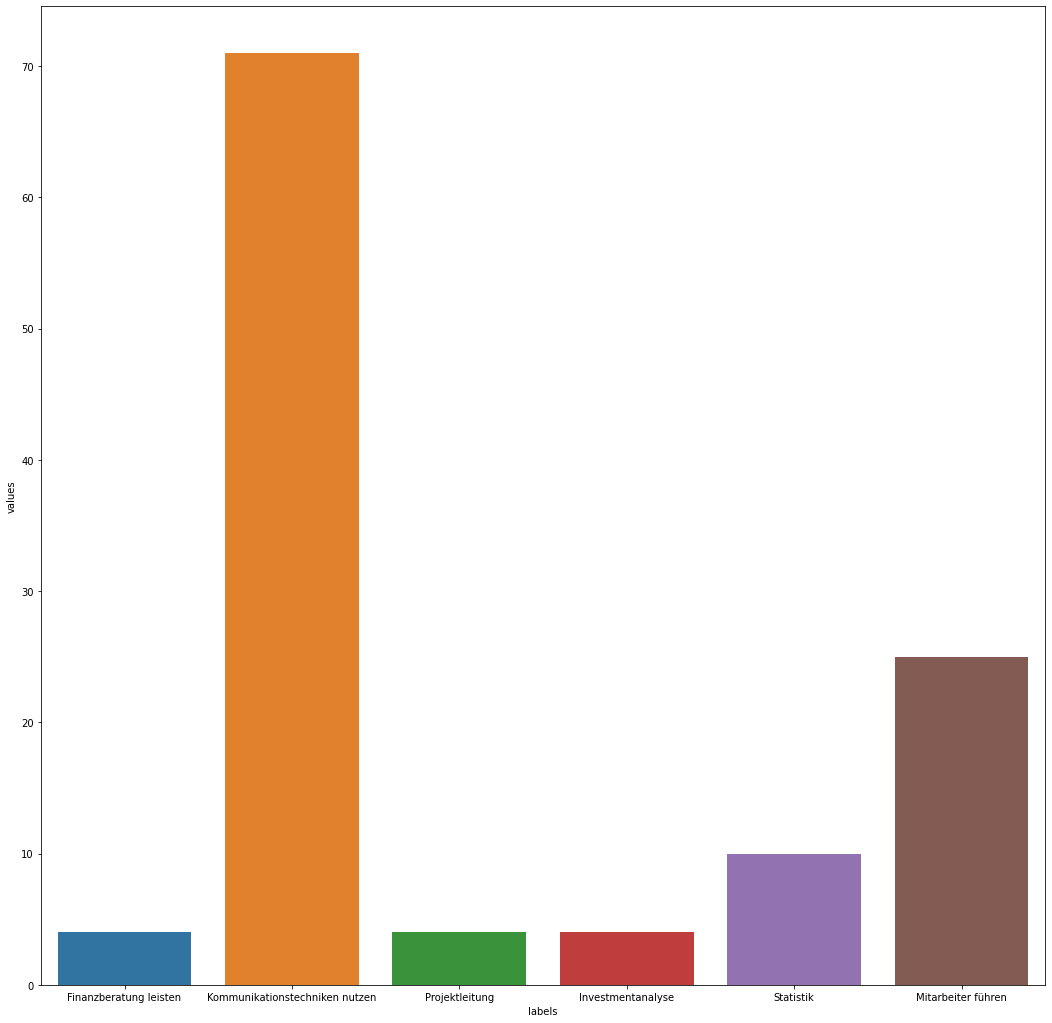

In [7]:
plt.figure(figsize=(18,18))
sns.barplot(data = df_chart
            ,x = 'labels'
            ,y = 'values'
            )


plt.show()